In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import gc
from tqdm import tqdm
import benchmark as bm
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

folder = os.getcwd()

GRAPH_DIR = "Strategies graphs"
os.makedirs(GRAPH_DIR, exist_ok = True)

## Load the data

In [3]:
firmchar = pd.read_csv(folder + "/Predictors/CompFirmCharac_sanitized.csv", parse_dates = True)
firmchar['date'] = pd.to_datetime(firmchar['date'], format = "%Y-%m-%d")

firmchar.head(2)

,date,gvkey,acchgy,aolochy,aqcy,capxy,chechy,cibegniy,cicurry,cidergly,...,txbcoy,txdcy,txty,txwy,xidocy,xidoy,xinty,xiy,xopry,xsgay
0,2000-01-31,1013,0.0,-4.824,17.963,46.785,21.138,NaN,NaN,NaN,...,NaN,NaN,15.30,NaN,0.000,0.000,NaN,0.0,496.900,205.600
1,2000-01-31,1082,0.0,-1.734,0.000,9.597,-2.956,NaN,NaN,NaN,...,NaN,1.061,0.59,NaN,2.975,-2.563,4.084,0.0,123.541,6.468


In [4]:
dailyret = pd.read_csv(folder + "/Targets/daily_crsp_sanitized.csv")
dailyret['date'] = pd.to_datetime(dailyret['date'], format = "%Y-%m-%d")
dailyret = dailyret[dailyret['date'] >= '2000-01-31']
dailyret.head(2)

,date,PERMCO,PERMNO,SICCD,NAICS,DlyRet,sprtrn
158482,2000-01-31,5,15580,6320,0,-0.068182,0.025218
158483,2000-01-31,7,14593,3573,0,0.020910,0.025218


In [5]:
linking = pd.read_csv(folder + "/linking_table_sanitized.csv")
linking['LINKDT'] = pd.to_datetime(linking['LINKDT'], format = "%Y-%m-%d")
linking['LINKENDDT'] = pd.to_datetime(linking['LINKENDDT'], format = "%Y-%m-%d")
linking.head(2)

,gvkey,LINKTYPE,PERMNO,PERMCO,LINKDT,LINKENDDT
0,1000,LU,25881,23369,1970-11-13,1978-06-30
1,1001,LU,10015,6398,1983-09-20,1986-07-31


In [6]:
fgv = firmchar.gvkey.unique()
lgv = linking.gvkey.unique()
print(f"There are {len(fgv)} unique gvkey values in firm characteristics dataset, \n with {len(lgv)} unique in linking table, and only {len(set(lgv) & set(fgv))} in intersection of these two")

There are 32455 unique gvkey values in firm characteristics dataset, 
 with 28809 unique in linking table, and only 17589 in intersection of these two


## Benchmark 2: Ridge regression

## To choose the optimal shrinkage parameter, we will run separate regression for each z. We will do it on a smaller dataframe (20% of the data - the latest data), considering this as a validation sample. 

In [7]:
fraction = int(len(firmchar) * 0.8)
start_date = firmchar.iloc[fraction:, :]['date'].min()

In [8]:
dailyret_short = dailyret[dailyret['date'] >= start_date]
firmchar_short = firmchar[firmchar['date'] >= start_date]

In [9]:
z_list = [0.001, 0.01, 0.1, 1, 10]

*All functions are provided in benchmark.py file*

In [10]:
results_Ridge = bm.portfolio_returns_ridge(dailyret_short.drop(columns = ['sprtrn']),
                                           firmchar_short,
                                           window=6,
                                           z_list=z_list,
                                           jkp_factors=None,
                                           linking_table=linking)


=== Running Ridge with z = 0.001 ===


  0%|                                                    | 0/47 [00:00<?, ?it/s]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


  2%|▉                                           | 1/47 [00:06<04:37,  6.04s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


  4%|█▊                                          | 2/47 [00:11<04:04,  5.43s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


  6%|██▊                                         | 3/47 [00:16<03:51,  5.26s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


  9%|███▋                                        | 4/47 [00:21<03:52,  5.41s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 11%|████▋                                       | 5/47 [00:26<03:42,  5.30s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 13%|█████▌                                      | 6/47 [00:32<03:44,  5.48s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 15%|██████▌                                     | 7/47 [00:38<03:43,  5.58s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 17%|███████▍                                    | 8/47 [00:44<03:38,  5.60s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 19%|████████▍                                   | 9/47 [00:50<03:37,  5.73s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 21%|█████████▏                                 | 10/47 [00:56<03:39,  5.94s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 23%|██████████                                 | 11/47 [01:02<03:36,  6.01s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 26%|██████████▉                                | 12/47 [01:08<03:30,  6.03s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 28%|███████████▉                               | 13/47 [01:15<03:29,  6.17s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 30%|████████████▊                              | 14/47 [01:21<03:19,  6.06s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 32%|█████████████▋                             | 15/47 [01:26<03:11,  5.98s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 34%|██████████████▋                            | 16/47 [01:33<03:07,  6.04s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 36%|███████████████▌                           | 17/47 [01:38<02:59,  5.97s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 38%|████████████████▍                          | 18/47 [01:45<02:56,  6.08s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 40%|█████████████████▍                         | 19/47 [01:51<02:55,  6.28s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 43%|██████████████████▎                        | 20/47 [01:57<02:47,  6.21s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 45%|███████████████████▏                       | 21/47 [02:04<02:46,  6.39s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 47%|████████████████████▏                      | 22/47 [02:11<02:43,  6.55s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 49%|█████████████████████                      | 23/47 [02:18<02:35,  6.48s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 51%|█████████████████████▉                     | 24/47 [02:24<02:29,  6.51s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 53%|██████████████████████▊                    | 25/47 [02:31<02:26,  6.65s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 55%|███████████████████████▊                   | 26/47 [02:37<02:17,  6.53s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 57%|████████████████████████▋                  | 27/47 [02:44<02:10,  6.53s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 60%|█████████████████████████▌                 | 28/47 [02:51<02:08,  6.74s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 62%|██████████████████████████▌                | 29/47 [02:57<01:59,  6.63s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 64%|███████████████████████████▍               | 30/47 [03:04<01:49,  6.46s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 66%|████████████████████████████▎              | 31/47 [03:10<01:42,  6.40s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 68%|█████████████████████████████▎             | 32/47 [03:16<01:34,  6.27s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 70%|██████████████████████████████▏            | 33/47 [03:22<01:27,  6.27s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 72%|███████████████████████████████            | 34/47 [03:29<01:22,  6.33s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 74%|████████████████████████████████           | 35/47 [03:35<01:15,  6.25s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 77%|████████████████████████████████▉          | 36/47 [03:41<01:08,  6.24s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 79%|█████████████████████████████████▊         | 37/47 [03:47<01:03,  6.36s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 81%|██████████████████████████████████▊        | 38/47 [03:53<00:56,  6.26s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 83%|███████████████████████████████████▋       | 39/47 [04:04<00:59,  7.40s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 85%|████████████████████████████████████▌      | 40/47 [04:10<00:49,  7.12s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 87%|█████████████████████████████████████▌     | 41/47 [04:16<00:40,  6.75s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 89%|██████████████████████████████████████▍    | 42/47 [04:22<00:33,  6.61s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 91%|███████████████████████████████████████▎   | 43/47 [04:29<00:26,  6.55s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 94%|████████████████████████████████████████▎  | 44/47 [04:34<00:19,  6.36s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 96%|█████████████████████████████████████████▏ | 45/47 [04:41<00:12,  6.37s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


 98%|██████████████████████████████████████████ | 46/47 [04:48<00:06,  6.48s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|███████████████████████████████████████████| 47/47 [04:54<00:00,  6.26s/it]



=== Running Ridge with z = 0.01 ===


  0%|                                                    | 0/47 [00:00<?, ?it/s]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


  2%|▉                                           | 1/47 [00:05<04:00,  5.22s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


  4%|█▊                                          | 2/47 [00:09<03:41,  4.91s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


  6%|██▊                                         | 3/47 [00:14<03:31,  4.81s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


  9%|███▋                                        | 4/47 [00:19<03:32,  4.95s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 11%|████▋                                       | 5/47 [00:24<03:27,  4.93s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 13%|█████▌                                      | 6/47 [00:29<03:26,  5.03s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 15%|██████▌                                     | 7/47 [00:35<03:30,  5.25s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 17%|███████▍                                    | 8/47 [00:41<03:27,  5.33s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 19%|████████▍                                   | 9/47 [00:46<03:29,  5.51s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 21%|█████████▏                                 | 10/47 [00:53<03:31,  5.73s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 23%|██████████                                 | 11/47 [00:58<03:26,  5.74s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 26%|██████████▉                                | 12/47 [01:04<03:23,  5.81s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 28%|███████████▉                               | 13/47 [01:11<03:22,  5.96s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 30%|████████████▊                              | 14/47 [01:17<03:17,  5.99s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 32%|█████████████▋                             | 15/47 [01:23<03:14,  6.06s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 34%|██████████████▋                            | 16/47 [01:29<03:11,  6.18s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 36%|███████████████▌                           | 17/47 [01:36<03:11,  6.38s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 38%|████████████████▍                          | 18/47 [01:43<03:03,  6.34s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 40%|█████████████████▍                         | 19/47 [01:51<03:10,  6.82s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 43%|██████████████████▎                        | 20/47 [01:57<03:02,  6.76s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 45%|███████████████████▏                       | 21/47 [02:04<02:53,  6.65s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 47%|████████████████████▏                      | 22/47 [02:10<02:47,  6.71s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 49%|█████████████████████                      | 23/47 [02:17<02:38,  6.62s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 51%|█████████████████████▉                     | 24/47 [02:23<02:32,  6.62s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 53%|██████████████████████▊                    | 25/47 [02:30<02:27,  6.69s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 55%|███████████████████████▊                   | 26/47 [02:36<02:16,  6.48s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 57%|████████████████████████▋                  | 27/47 [02:42<02:07,  6.36s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 60%|█████████████████████████▌                 | 28/47 [02:49<02:01,  6.40s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 62%|██████████████████████████▌                | 29/47 [02:55<01:53,  6.30s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 64%|███████████████████████████▍               | 30/47 [03:01<01:45,  6.18s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 66%|████████████████████████████▎              | 31/47 [03:07<01:39,  6.23s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 68%|█████████████████████████████▎             | 32/47 [03:13<01:30,  6.05s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 70%|██████████████████████████████▏            | 33/47 [03:19<01:24,  6.03s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 72%|███████████████████████████████            | 34/47 [03:25<01:20,  6.16s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 74%|████████████████████████████████           | 35/47 [03:31<01:12,  6.02s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 77%|████████████████████████████████▉          | 36/47 [03:37<01:07,  6.15s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 79%|█████████████████████████████████▊         | 37/47 [03:46<01:07,  6.79s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 81%|██████████████████████████████████▊        | 38/47 [03:52<01:00,  6.75s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 83%|███████████████████████████████████▋       | 39/47 [03:59<00:53,  6.72s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 85%|████████████████████████████████████▌      | 40/47 [04:05<00:46,  6.65s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 87%|█████████████████████████████████████▌     | 41/47 [04:12<00:38,  6.47s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 89%|██████████████████████████████████████▍    | 42/47 [04:18<00:32,  6.41s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 91%|███████████████████████████████████████▎   | 43/47 [04:25<00:26,  6.50s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 94%|████████████████████████████████████████▎  | 44/47 [04:31<00:19,  6.51s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 96%|█████████████████████████████████████████▏ | 45/47 [04:38<00:13,  6.52s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


 98%|██████████████████████████████████████████ | 46/47 [04:44<00:06,  6.54s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|███████████████████████████████████████████| 47/47 [04:50<00:00,  6.19s/it]



=== Running Ridge with z = 0.1 ===


  0%|                                                    | 0/47 [00:00<?, ?it/s]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


  2%|▉                                           | 1/47 [00:05<04:16,  5.57s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


  4%|█▊                                          | 2/47 [00:10<03:54,  5.21s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


  6%|██▊                                         | 3/47 [00:15<03:44,  5.11s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


  9%|███▋                                        | 4/47 [00:20<03:42,  5.19s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 11%|████▋                                       | 5/47 [00:25<03:32,  5.05s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 13%|█████▌                                      | 6/47 [00:30<03:28,  5.08s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 15%|██████▌                                     | 7/47 [00:36<03:28,  5.20s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 17%|███████▍                                    | 8/47 [00:41<03:25,  5.27s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 19%|████████▍                                   | 9/47 [00:47<03:24,  5.39s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 21%|█████████▏                                 | 10/47 [00:53<03:30,  5.68s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 23%|██████████                                 | 11/47 [00:59<03:26,  5.73s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 26%|██████████▉                                | 12/47 [01:05<03:25,  5.86s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 28%|███████████▉                               | 13/47 [01:12<03:25,  6.05s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 30%|████████████▊                              | 14/47 [01:17<03:16,  5.95s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 32%|█████████████▋                             | 15/47 [01:23<03:09,  5.91s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 34%|██████████████▋                            | 16/47 [01:30<03:07,  6.06s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 36%|███████████████▌                           | 17/47 [01:35<03:00,  6.01s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 38%|████████████████▍                          | 18/47 [01:42<02:57,  6.11s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 40%|█████████████████▍                         | 19/47 [01:48<02:54,  6.24s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 43%|██████████████████▎                        | 20/47 [01:55<02:50,  6.30s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 45%|███████████████████▏                       | 21/47 [02:02<02:47,  6.44s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 47%|████████████████████▏                      | 22/47 [02:08<02:43,  6.53s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 49%|█████████████████████                      | 23/47 [02:14<02:34,  6.42s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 51%|█████████████████████▉                     | 24/47 [02:21<02:28,  6.47s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 53%|██████████████████████▊                    | 25/47 [02:28<02:27,  6.72s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 55%|███████████████████████▊                   | 26/47 [02:35<02:17,  6.56s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 57%|████████████████████████▋                  | 27/47 [02:41<02:08,  6.42s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 60%|█████████████████████████▌                 | 28/47 [02:47<02:03,  6.50s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 62%|██████████████████████████▌                | 29/47 [02:53<01:54,  6.37s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 64%|███████████████████████████▍               | 30/47 [02:59<01:45,  6.22s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 66%|████████████████████████████▎              | 31/47 [03:06<01:40,  6.26s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 68%|█████████████████████████████▎             | 32/47 [03:12<01:33,  6.22s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 70%|██████████████████████████████▏            | 33/47 [03:18<01:27,  6.24s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 72%|███████████████████████████████            | 34/47 [03:25<01:24,  6.47s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 74%|████████████████████████████████           | 35/47 [03:31<01:16,  6.38s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 77%|████████████████████████████████▉          | 36/47 [03:37<01:09,  6.34s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 79%|█████████████████████████████████▊         | 37/47 [03:44<01:03,  6.37s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 81%|██████████████████████████████████▊        | 38/47 [03:50<00:57,  6.41s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 83%|███████████████████████████████████▋       | 39/47 [03:57<00:51,  6.41s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 85%|████████████████████████████████████▌      | 40/47 [04:03<00:44,  6.41s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 87%|█████████████████████████████████████▌     | 41/47 [04:09<00:37,  6.24s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 89%|██████████████████████████████████████▍    | 42/47 [04:15<00:31,  6.23s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 91%|███████████████████████████████████████▎   | 43/47 [04:22<00:25,  6.37s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 94%|████████████████████████████████████████▎  | 44/47 [04:30<00:20,  6.75s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 96%|█████████████████████████████████████████▏ | 45/47 [04:36<00:13,  6.62s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


 98%|██████████████████████████████████████████ | 46/47 [04:43<00:06,  6.89s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|███████████████████████████████████████████| 47/47 [04:50<00:00,  6.17s/it]



=== Running Ridge with z = 1 ===


  0%|                                                    | 0/47 [00:00<?, ?it/s]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


  2%|▉                                           | 1/47 [00:05<04:11,  5.47s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


  4%|█▊                                          | 2/47 [00:10<03:52,  5.17s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


  6%|██▊                                         | 3/47 [00:15<03:39,  4.99s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


  9%|███▋                                        | 4/47 [00:20<03:38,  5.08s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 11%|████▋                                       | 5/47 [00:25<03:28,  4.97s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 13%|█████▌                                      | 6/47 [00:30<03:23,  4.95s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 15%|██████▌                                     | 7/47 [00:35<03:25,  5.13s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 17%|███████▍                                    | 8/47 [00:40<03:22,  5.19s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 19%|████████▍                                   | 9/47 [00:46<03:23,  5.37s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 21%|█████████▏                                 | 10/47 [00:52<03:26,  5.58s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 23%|██████████                                 | 11/47 [00:58<03:22,  5.62s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 26%|██████████▉                                | 12/47 [01:04<03:21,  5.76s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 28%|███████████▉                               | 13/47 [01:10<03:22,  5.97s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 30%|████████████▊                              | 14/47 [01:16<03:13,  5.86s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 32%|█████████████▋                             | 15/47 [01:22<03:07,  5.85s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 34%|██████████████▋                            | 16/47 [01:28<03:06,  6.01s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 36%|███████████████▌                           | 17/47 [01:34<03:00,  6.01s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 38%|████████████████▍                          | 18/47 [01:40<02:53,  5.98s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 40%|█████████████████▍                         | 19/47 [01:47<02:51,  6.11s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 43%|██████████████████▎                        | 20/47 [01:53<02:44,  6.10s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 45%|███████████████████▏                       | 21/47 [01:59<02:40,  6.17s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 47%|████████████████████▏                      | 22/47 [02:06<02:38,  6.36s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 49%|█████████████████████                      | 23/47 [02:12<02:30,  6.26s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 51%|█████████████████████▉                     | 24/47 [02:18<02:24,  6.27s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 53%|██████████████████████▊                    | 25/47 [02:25<02:21,  6.43s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 55%|███████████████████████▊                   | 26/47 [02:31<02:13,  6.34s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 57%|████████████████████████▋                  | 27/47 [02:37<02:05,  6.27s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 60%|█████████████████████████▌                 | 28/47 [02:44<01:59,  6.31s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 62%|██████████████████████████▌                | 29/47 [02:49<01:51,  6.18s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 64%|███████████████████████████▍               | 30/47 [02:55<01:42,  6.02s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 66%|████████████████████████████▎              | 31/47 [03:01<01:37,  6.08s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 68%|█████████████████████████████▎             | 32/47 [03:07<01:29,  5.97s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 70%|██████████████████████████████▏            | 33/47 [03:13<01:24,  6.01s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 72%|███████████████████████████████            | 34/47 [03:20<01:19,  6.15s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 74%|████████████████████████████████           | 35/47 [03:25<01:12,  6.07s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 77%|████████████████████████████████▉          | 36/47 [03:32<01:08,  6.27s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 79%|█████████████████████████████████▊         | 37/47 [03:39<01:03,  6.38s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 81%|██████████████████████████████████▊        | 38/47 [03:45<00:56,  6.28s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 83%|███████████████████████████████████▋       | 39/47 [03:51<00:49,  6.24s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 85%|████████████████████████████████████▌      | 40/47 [03:58<00:44,  6.33s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 87%|█████████████████████████████████████▌     | 41/47 [04:05<00:40,  6.74s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 89%|██████████████████████████████████████▍    | 42/47 [04:11<00:32,  6.57s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 91%|███████████████████████████████████████▎   | 43/47 [04:18<00:26,  6.57s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 94%|████████████████████████████████████████▎  | 44/47 [04:24<00:19,  6.35s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 96%|█████████████████████████████████████████▏ | 45/47 [04:30<00:12,  6.29s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


 98%|██████████████████████████████████████████ | 46/47 [04:37<00:06,  6.44s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|███████████████████████████████████████████| 47/47 [04:43<00:00,  6.03s/it]



=== Running Ridge with z = 10 ===


  0%|                                                    | 0/47 [00:00<?, ?it/s]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


  2%|▉                                           | 1/47 [00:05<04:01,  5.25s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


  4%|█▊                                          | 2/47 [00:09<03:40,  4.89s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


  6%|██▊                                         | 3/47 [00:14<03:33,  4.85s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


  9%|███▋                                        | 4/47 [00:19<03:33,  4.98s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 11%|████▋                                       | 5/47 [00:24<03:23,  4.86s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 13%|█████▌                                      | 6/47 [00:29<03:22,  4.93s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 15%|██████▌                                     | 7/47 [00:34<03:21,  5.05s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 17%|███████▍                                    | 8/47 [00:39<03:17,  5.07s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 19%|████████▍                                   | 9/47 [00:45<03:20,  5.27s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 21%|█████████▏                                 | 10/47 [00:51<03:21,  5.44s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 23%|██████████                                 | 11/47 [00:57<03:18,  5.51s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 26%|██████████▉                                | 12/47 [01:03<03:18,  5.68s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 28%|███████████▉                               | 13/47 [01:09<03:20,  5.89s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 30%|████████████▊                              | 14/47 [01:15<03:12,  5.84s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 32%|█████████████▋                             | 15/47 [01:21<03:05,  5.80s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 34%|██████████████▋                            | 16/47 [01:27<03:04,  5.97s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 36%|███████████████▌                           | 17/47 [01:33<02:58,  5.95s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 38%|████████████████▍                          | 18/47 [01:39<02:54,  6.01s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 40%|█████████████████▍                         | 19/47 [01:45<02:51,  6.12s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 43%|██████████████████▎                        | 20/47 [01:51<02:44,  6.09s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 45%|███████████████████▏                       | 21/47 [01:58<02:40,  6.18s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 47%|████████████████████▏                      | 22/47 [02:04<02:37,  6.32s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 49%|█████████████████████                      | 23/47 [02:10<02:28,  6.20s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 51%|█████████████████████▉                     | 24/47 [02:17<02:23,  6.25s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 53%|██████████████████████▊                    | 25/47 [02:24<02:21,  6.43s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 55%|███████████████████████▊                   | 26/47 [02:30<02:15,  6.45s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 57%|████████████████████████▋                  | 27/47 [02:36<02:06,  6.33s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 60%|█████████████████████████▌                 | 28/47 [02:42<02:00,  6.35s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 62%|██████████████████████████▌                | 29/47 [02:49<01:52,  6.25s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 64%|███████████████████████████▍               | 30/47 [02:54<01:43,  6.09s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 66%|████████████████████████████▎              | 31/47 [03:00<01:38,  6.13s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 68%|█████████████████████████████▎             | 32/47 [03:06<01:31,  6.09s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 70%|██████████████████████████████▏            | 33/47 [03:13<01:27,  6.28s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 72%|███████████████████████████████            | 34/47 [03:20<01:23,  6.44s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 74%|████████████████████████████████           | 35/47 [03:26<01:16,  6.34s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 77%|████████████████████████████████▉          | 36/47 [03:32<01:09,  6.31s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 79%|█████████████████████████████████▊         | 37/47 [03:39<01:03,  6.40s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 81%|██████████████████████████████████▊        | 38/47 [03:45<00:56,  6.30s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 83%|███████████████████████████████████▋       | 39/47 [03:51<00:49,  6.22s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 85%|████████████████████████████████████▌      | 40/47 [03:57<00:43,  6.28s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 87%|█████████████████████████████████████▌     | 41/47 [04:03<00:36,  6.14s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 89%|██████████████████████████████████████▍    | 42/47 [04:09<00:30,  6.13s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 91%|███████████████████████████████████████▎   | 43/47 [04:16<00:24,  6.19s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 94%|████████████████████████████████████████▎  | 44/47 [04:22<00:18,  6.10s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 96%|█████████████████████████████████████████▏ | 45/47 [04:28<00:12,  6.12s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


 98%|██████████████████████████████████████████ | 46/47 [04:34<00:06,  6.30s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|███████████████████████████████████████████| 47/47 [04:40<00:00,  5.98s/it]


### Choose optimal shrinkage parameter (largest Sharpe Ratio)

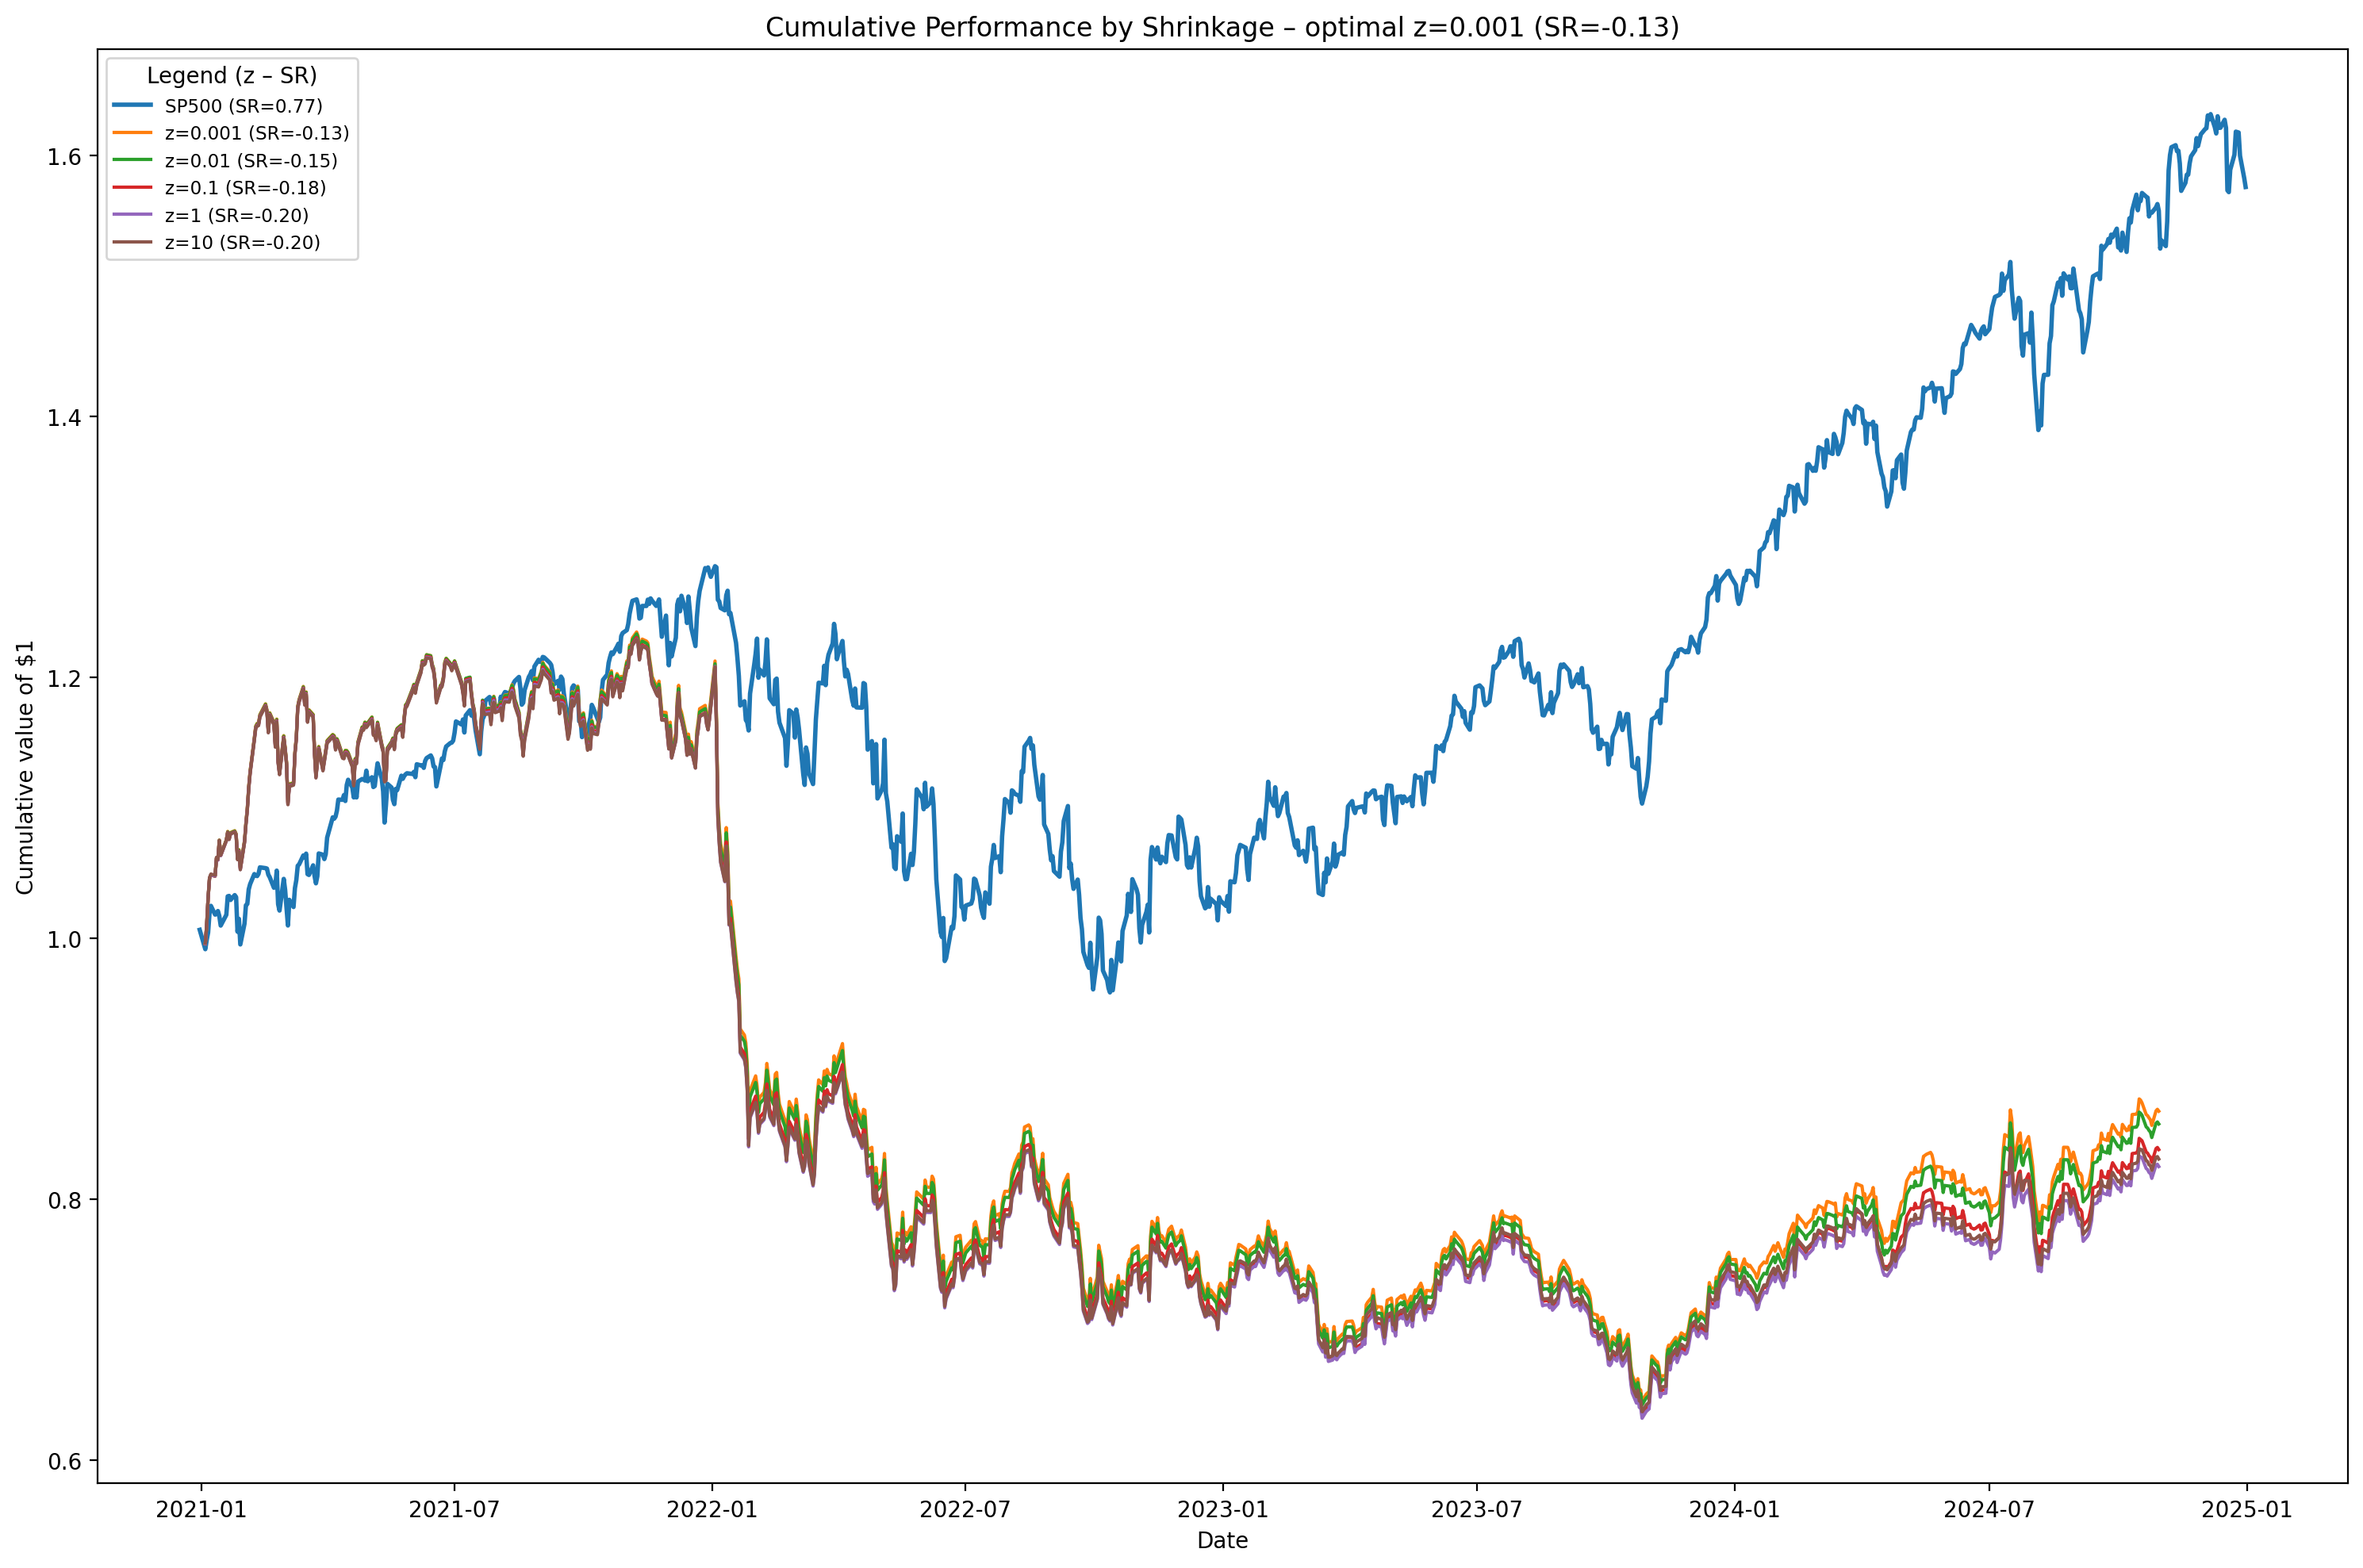

Optimal shrinkage → z = 0.001 with Sharpe = -0.1300


In [12]:
first_dates = [first for _, _, first in results_Ridge]
first_date   = min(first_dates)

sp500 = (
    dailyret[['date','sprtrn']]
    .drop_duplicates('date')
    .query("date >= @first_date")
    .sort_values('date')
    .reset_index(drop=True)
)
sp500['cumulative_1dollar'] = (sp500['sprtrn'] + 1).cumprod()
sharpe_SP = bm.sharpe_ratio(sp500['sprtrn'])


fig, ax = plt.subplots(figsize=(15,10))


ax.plot(sp500['date'], 
        sp500['cumulative_1dollar'], 
        label=f"SP500 (SR={sharpe_SP:.2f})", 
        linewidth=2)

# loop over z‐results
sharpes = {}
for z, port_df, _ in results_Ridge:
    df = (
        port_df
        .query("date >= @first_date")
        .sort_values('date')
        .reset_index(drop=True)
    )
 
    df['cumulative_1dollar'] = (df['weighted_return'] + 1).cumprod()

    sr = bm.sharpe_ratio(df['weighted_return'])
    sharpes[z] = sr

    # plot
    ax.plot(df['date'], 
            df['cumulative_1dollar'], 
            label=f"z={z} (SR={sr:.2f})")

# best z
best_z  = max(sharpes, key=sharpes.get)
best_sr = sharpes[best_z]


ax.set_xlabel("Date")
ax.set_ylabel("Cumulative value of $1")
ax.set_title(f"Cumulative Performance by Shrinkage – optimal z={best_z} (SR={best_sr:.2f})")
ax.legend(title="Legend (z – SR)", loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

print(f"Optimal shrinkage → z = {best_z} with Sharpe = {best_sr:.4f}")

### Train Ridge with the optimap shrinkage (on the whole sample)

In [13]:
results_Ridge_optimal = bm.portfolio_returns_ridge(dailyret.drop(columns = ['sprtrn']),
                                                   firmchar,
                                                   window=6,
                                                   z_list=[best_z],
                                                   jkp_factors=None,
                                                   linking_table=linking)


=== Running Ridge with z = 0.001 ===


  0%|                                                   | 0/292 [00:00<?, ?it/s]

Max train date = 2000-06-30 00:00:00, Test date = 2000-07-31 00:00:00


  0%|▏                                          | 1/292 [00:06<30:39,  6.32s/it]

Max train date = 2000-07-31 00:00:00, Test date = 2000-08-31 00:00:00


  1%|▎                                          | 2/292 [00:13<31:44,  6.57s/it]

Max train date = 2000-08-31 00:00:00, Test date = 2000-09-30 00:00:00


  1%|▍                                          | 3/292 [00:19<32:19,  6.71s/it]

Max train date = 2000-09-30 00:00:00, Test date = 2000-10-31 00:00:00


  1%|▌                                          | 4/292 [00:26<31:22,  6.54s/it]

Max train date = 2000-10-31 00:00:00, Test date = 2000-11-30 00:00:00


  2%|▋                                          | 5/292 [00:32<31:27,  6.58s/it]

Max train date = 2000-11-30 00:00:00, Test date = 2000-12-31 00:00:00


  2%|▉                                          | 6/292 [00:39<31:12,  6.55s/it]

Max train date = 2000-12-31 00:00:00, Test date = 2001-01-31 00:00:00


  2%|█                                          | 7/292 [00:45<29:51,  6.29s/it]

Max train date = 2001-01-31 00:00:00, Test date = 2001-02-28 00:00:00


  3%|█▏                                         | 8/292 [00:50<29:03,  6.14s/it]

Max train date = 2001-02-28 00:00:00, Test date = 2001-03-31 00:00:00


  3%|█▎                                         | 9/292 [00:57<29:01,  6.15s/it]

Max train date = 2001-03-31 00:00:00, Test date = 2001-04-30 00:00:00


  3%|█▍                                        | 10/292 [01:02<27:58,  5.95s/it]

Max train date = 2001-04-30 00:00:00, Test date = 2001-05-31 00:00:00


  4%|█▌                                        | 11/292 [01:08<27:17,  5.83s/it]

Max train date = 2001-05-31 00:00:00, Test date = 2001-06-30 00:00:00


  4%|█▋                                        | 12/292 [01:13<27:06,  5.81s/it]

Max train date = 2001-06-30 00:00:00, Test date = 2001-07-31 00:00:00


  4%|█▊                                        | 13/292 [01:19<26:29,  5.70s/it]

Max train date = 2001-07-31 00:00:00, Test date = 2001-08-31 00:00:00


  5%|██                                        | 14/292 [01:24<26:13,  5.66s/it]

Max train date = 2001-08-31 00:00:00, Test date = 2001-09-30 00:00:00


  5%|██▏                                       | 15/292 [01:30<26:16,  5.69s/it]

Max train date = 2001-09-30 00:00:00, Test date = 2001-10-31 00:00:00


  5%|██▎                                       | 16/292 [01:35<25:24,  5.52s/it]

Max train date = 2001-10-31 00:00:00, Test date = 2001-11-30 00:00:00


  6%|██▍                                       | 17/292 [01:41<24:55,  5.44s/it]

Max train date = 2001-11-30 00:00:00, Test date = 2001-12-31 00:00:00


  6%|██▌                                       | 18/292 [01:46<24:52,  5.45s/it]

Max train date = 2001-12-31 00:00:00, Test date = 2002-01-31 00:00:00


  7%|██▋                                       | 19/292 [01:51<24:13,  5.33s/it]

Max train date = 2002-01-31 00:00:00, Test date = 2002-02-28 00:00:00


  7%|██▉                                       | 20/292 [01:56<23:45,  5.24s/it]

Max train date = 2002-02-28 00:00:00, Test date = 2002-03-31 00:00:00


  7%|███                                       | 21/292 [02:02<24:06,  5.34s/it]

Max train date = 2002-03-31 00:00:00, Test date = 2002-04-30 00:00:00


  8%|███▏                                      | 22/292 [02:07<23:40,  5.26s/it]

Max train date = 2002-04-30 00:00:00, Test date = 2002-05-31 00:00:00


  8%|███▎                                      | 23/292 [02:12<23:26,  5.23s/it]

Max train date = 2002-05-31 00:00:00, Test date = 2002-06-30 00:00:00


  8%|███▍                                      | 24/292 [02:17<23:34,  5.28s/it]

Max train date = 2002-06-30 00:00:00, Test date = 2002-07-31 00:00:00


  9%|███▌                                      | 25/292 [02:22<23:12,  5.21s/it]

Max train date = 2002-07-31 00:00:00, Test date = 2002-08-31 00:00:00


  9%|███▋                                      | 26/292 [02:28<23:11,  5.23s/it]

Max train date = 2002-08-31 00:00:00, Test date = 2002-09-30 00:00:00


  9%|███▉                                      | 27/292 [02:33<23:10,  5.25s/it]

Max train date = 2002-09-30 00:00:00, Test date = 2002-10-31 00:00:00


 10%|████                                      | 28/292 [02:38<22:33,  5.13s/it]

Max train date = 2002-10-31 00:00:00, Test date = 2002-11-30 00:00:00


 10%|████▏                                     | 29/292 [02:43<22:26,  5.12s/it]

Max train date = 2002-11-30 00:00:00, Test date = 2002-12-31 00:00:00


 10%|████▎                                     | 30/292 [02:48<22:23,  5.13s/it]

Max train date = 2002-12-31 00:00:00, Test date = 2003-01-31 00:00:00


 11%|████▍                                     | 31/292 [02:53<21:48,  5.01s/it]

Max train date = 2003-01-31 00:00:00, Test date = 2003-02-28 00:00:00


 11%|████▌                                     | 32/292 [02:57<21:17,  4.91s/it]

Max train date = 2003-02-28 00:00:00, Test date = 2003-03-31 00:00:00


 11%|████▋                                     | 33/292 [03:02<21:20,  4.95s/it]

Max train date = 2003-03-31 00:00:00, Test date = 2003-04-30 00:00:00


 12%|████▉                                     | 34/292 [03:07<20:50,  4.85s/it]

Max train date = 2003-04-30 00:00:00, Test date = 2003-05-31 00:00:00


 12%|█████                                     | 35/292 [03:12<20:30,  4.79s/it]

Max train date = 2003-05-31 00:00:00, Test date = 2003-06-30 00:00:00


 12%|█████▏                                    | 36/292 [03:17<20:28,  4.80s/it]

Max train date = 2003-06-30 00:00:00, Test date = 2003-07-31 00:00:00


 13%|█████▎                                    | 37/292 [03:21<20:03,  4.72s/it]

Max train date = 2003-07-31 00:00:00, Test date = 2003-08-31 00:00:00


 13%|█████▍                                    | 38/292 [03:26<19:53,  4.70s/it]

Max train date = 2003-08-31 00:00:00, Test date = 2003-09-30 00:00:00


 13%|█████▌                                    | 39/292 [03:31<20:01,  4.75s/it]

Max train date = 2003-09-30 00:00:00, Test date = 2003-10-31 00:00:00


 14%|█████▊                                    | 40/292 [03:35<19:50,  4.73s/it]

Max train date = 2003-10-31 00:00:00, Test date = 2003-11-30 00:00:00


 14%|█████▉                                    | 41/292 [03:40<19:46,  4.73s/it]

Max train date = 2003-11-30 00:00:00, Test date = 2003-12-31 00:00:00


 14%|██████                                    | 42/292 [03:45<19:55,  4.78s/it]

Max train date = 2003-12-31 00:00:00, Test date = 2004-01-31 00:00:00


 15%|██████▏                                   | 43/292 [03:49<19:26,  4.68s/it]

Max train date = 2004-01-31 00:00:00, Test date = 2004-02-29 00:00:00


 15%|██████▎                                   | 44/292 [03:54<19:03,  4.61s/it]

Max train date = 2004-02-29 00:00:00, Test date = 2004-03-31 00:00:00


 15%|██████▍                                   | 45/292 [03:59<19:13,  4.67s/it]

Max train date = 2004-03-31 00:00:00, Test date = 2004-04-30 00:00:00


 16%|██████▌                                   | 46/292 [04:03<18:45,  4.58s/it]

Max train date = 2004-04-30 00:00:00, Test date = 2004-05-31 00:00:00


 16%|██████▊                                   | 47/292 [04:08<18:40,  4.58s/it]

Max train date = 2004-05-31 00:00:00, Test date = 2004-06-30 00:00:00


 16%|██████▉                                   | 48/292 [04:12<18:58,  4.67s/it]

Max train date = 2004-06-30 00:00:00, Test date = 2004-07-31 00:00:00


 17%|███████                                   | 49/292 [04:17<18:42,  4.62s/it]

Max train date = 2004-07-31 00:00:00, Test date = 2004-08-31 00:00:00


 17%|███████▏                                  | 50/292 [04:25<22:59,  5.70s/it]

Max train date = 2004-08-31 00:00:00, Test date = 2004-09-30 00:00:00


 17%|███████▎                                  | 51/292 [04:31<22:27,  5.59s/it]

Max train date = 2004-09-30 00:00:00, Test date = 2004-10-31 00:00:00


 18%|███████▍                                  | 52/292 [04:35<21:24,  5.35s/it]

Max train date = 2004-10-31 00:00:00, Test date = 2004-11-30 00:00:00


 18%|███████▌                                  | 53/292 [04:40<21:04,  5.29s/it]

Max train date = 2004-11-30 00:00:00, Test date = 2004-12-31 00:00:00


 18%|███████▊                                  | 54/292 [04:46<21:06,  5.32s/it]

Max train date = 2004-12-31 00:00:00, Test date = 2005-01-31 00:00:00


 19%|███████▉                                  | 55/292 [04:51<20:31,  5.20s/it]

Max train date = 2005-01-31 00:00:00, Test date = 2005-02-28 00:00:00


 19%|████████                                  | 56/292 [04:56<20:08,  5.12s/it]

Max train date = 2005-02-28 00:00:00, Test date = 2005-03-31 00:00:00


 20%|████████▏                                 | 57/292 [05:01<20:10,  5.15s/it]

Max train date = 2005-03-31 00:00:00, Test date = 2005-04-30 00:00:00


 20%|████████▎                                 | 58/292 [05:06<19:35,  5.02s/it]

Max train date = 2005-04-30 00:00:00, Test date = 2005-05-31 00:00:00


 20%|████████▍                                 | 59/292 [05:11<19:36,  5.05s/it]

Max train date = 2005-05-31 00:00:00, Test date = 2005-06-30 00:00:00


 21%|████████▋                                 | 60/292 [05:16<20:04,  5.19s/it]

Max train date = 2005-06-30 00:00:00, Test date = 2005-07-31 00:00:00


 21%|████████▊                                 | 61/292 [05:21<19:51,  5.16s/it]

Max train date = 2005-07-31 00:00:00, Test date = 2005-08-31 00:00:00


 21%|████████▉                                 | 62/292 [05:27<19:59,  5.21s/it]

Max train date = 2005-08-31 00:00:00, Test date = 2005-09-30 00:00:00


 22%|█████████                                 | 63/292 [05:32<20:21,  5.33s/it]

Max train date = 2005-09-30 00:00:00, Test date = 2005-10-31 00:00:00


 22%|█████████▏                                | 64/292 [05:37<19:59,  5.26s/it]

Max train date = 2005-10-31 00:00:00, Test date = 2005-11-30 00:00:00


 22%|█████████▎                                | 65/292 [05:43<19:59,  5.29s/it]

Max train date = 2005-11-30 00:00:00, Test date = 2005-12-31 00:00:00


 23%|█████████▍                                | 66/292 [05:48<20:15,  5.38s/it]

Max train date = 2005-12-31 00:00:00, Test date = 2006-01-31 00:00:00


 23%|█████████▋                                | 67/292 [05:54<19:56,  5.32s/it]

Max train date = 2006-01-31 00:00:00, Test date = 2006-02-28 00:00:00


 23%|█████████▊                                | 68/292 [05:59<19:29,  5.22s/it]

Max train date = 2006-02-28 00:00:00, Test date = 2006-03-31 00:00:00


 24%|█████████▉                                | 69/292 [06:04<20:07,  5.41s/it]

Max train date = 2006-03-31 00:00:00, Test date = 2006-04-30 00:00:00


 24%|██████████                                | 70/292 [06:09<19:34,  5.29s/it]

Max train date = 2006-04-30 00:00:00, Test date = 2006-05-31 00:00:00


 24%|██████████▏                               | 71/292 [06:14<19:13,  5.22s/it]

Max train date = 2006-05-31 00:00:00, Test date = 2006-06-30 00:00:00


 25%|██████████▎                               | 72/292 [06:20<19:48,  5.40s/it]

Max train date = 2006-06-30 00:00:00, Test date = 2006-07-31 00:00:00


 25%|██████████▌                               | 73/292 [06:25<19:28,  5.34s/it]

Max train date = 2006-07-31 00:00:00, Test date = 2006-08-31 00:00:00


 25%|██████████▋                               | 74/292 [06:31<19:24,  5.34s/it]

Max train date = 2006-08-31 00:00:00, Test date = 2006-09-30 00:00:00


 26%|██████████▊                               | 75/292 [06:36<19:33,  5.41s/it]

Max train date = 2006-09-30 00:00:00, Test date = 2006-10-31 00:00:00


 26%|██████████▉                               | 76/292 [06:42<19:11,  5.33s/it]

Max train date = 2006-10-31 00:00:00, Test date = 2006-11-30 00:00:00


 26%|███████████                               | 77/292 [06:47<19:05,  5.33s/it]

Max train date = 2006-11-30 00:00:00, Test date = 2006-12-31 00:00:00


 27%|███████████▏                              | 78/292 [06:53<19:22,  5.43s/it]

Max train date = 2006-12-31 00:00:00, Test date = 2007-01-31 00:00:00


 27%|███████████▎                              | 79/292 [06:57<18:33,  5.23s/it]

Max train date = 2007-01-31 00:00:00, Test date = 2007-02-28 00:00:00


 27%|███████████▌                              | 80/292 [07:02<18:06,  5.12s/it]

Max train date = 2007-02-28 00:00:00, Test date = 2007-03-31 00:00:00


 28%|███████████▋                              | 81/292 [07:08<18:44,  5.33s/it]

Max train date = 2007-03-31 00:00:00, Test date = 2007-04-30 00:00:00


 28%|███████████▊                              | 82/292 [07:15<19:58,  5.71s/it]

Max train date = 2007-04-30 00:00:00, Test date = 2007-05-31 00:00:00


 28%|███████████▉                              | 83/292 [07:20<19:27,  5.59s/it]

Max train date = 2007-05-31 00:00:00, Test date = 2007-06-30 00:00:00


 29%|████████████                              | 84/292 [07:25<19:18,  5.57s/it]

Max train date = 2007-06-30 00:00:00, Test date = 2007-07-31 00:00:00


 29%|████████████▏                             | 85/292 [07:30<18:44,  5.43s/it]

Max train date = 2007-07-31 00:00:00, Test date = 2007-08-31 00:00:00


 29%|████████████▎                             | 86/292 [07:36<18:47,  5.47s/it]

Max train date = 2007-08-31 00:00:00, Test date = 2007-09-30 00:00:00


 30%|████████████▌                             | 87/292 [07:42<18:49,  5.51s/it]

Max train date = 2007-09-30 00:00:00, Test date = 2007-10-31 00:00:00


 30%|████████████▋                             | 88/292 [07:47<18:20,  5.40s/it]

Max train date = 2007-10-31 00:00:00, Test date = 2007-11-30 00:00:00


 30%|████████████▊                             | 89/292 [07:52<18:24,  5.44s/it]

Max train date = 2007-11-30 00:00:00, Test date = 2007-12-31 00:00:00


 31%|████████████▉                             | 90/292 [07:58<18:31,  5.50s/it]

Max train date = 2007-12-31 00:00:00, Test date = 2008-01-31 00:00:00


 31%|█████████████                             | 91/292 [08:03<18:08,  5.41s/it]

Max train date = 2008-01-31 00:00:00, Test date = 2008-02-29 00:00:00


 32%|█████████████▏                            | 92/292 [08:08<17:54,  5.37s/it]

Max train date = 2008-02-29 00:00:00, Test date = 2008-03-31 00:00:00


 32%|█████████████▍                            | 93/292 [08:14<17:55,  5.40s/it]

Max train date = 2008-03-31 00:00:00, Test date = 2008-04-30 00:00:00


 32%|█████████████▌                            | 94/292 [08:19<17:21,  5.26s/it]

Max train date = 2008-04-30 00:00:00, Test date = 2008-05-31 00:00:00


 33%|█████████████▋                            | 95/292 [08:24<17:20,  5.28s/it]

Max train date = 2008-05-31 00:00:00, Test date = 2008-06-30 00:00:00


 33%|█████████████▊                            | 96/292 [08:30<17:17,  5.30s/it]

Max train date = 2008-06-30 00:00:00, Test date = 2008-07-31 00:00:00


 33%|█████████████▉                            | 97/292 [08:34<16:47,  5.17s/it]

Max train date = 2008-07-31 00:00:00, Test date = 2008-08-31 00:00:00


 34%|██████████████                            | 98/292 [08:40<16:50,  5.21s/it]

Max train date = 2008-08-31 00:00:00, Test date = 2008-09-30 00:00:00


 34%|██████████████▏                           | 99/292 [08:45<16:56,  5.27s/it]

Max train date = 2008-09-30 00:00:00, Test date = 2008-10-31 00:00:00


 34%|██████████████                           | 100/292 [08:50<16:32,  5.17s/it]

Max train date = 2008-10-31 00:00:00, Test date = 2008-11-30 00:00:00


 35%|██████████████▏                          | 101/292 [08:55<16:29,  5.18s/it]

Max train date = 2008-11-30 00:00:00, Test date = 2008-12-31 00:00:00


 35%|██████████████▎                          | 102/292 [09:01<16:40,  5.26s/it]

Max train date = 2008-12-31 00:00:00, Test date = 2009-01-31 00:00:00


 35%|██████████████▍                          | 103/292 [09:05<16:04,  5.10s/it]

Max train date = 2009-01-31 00:00:00, Test date = 2009-02-28 00:00:00


 36%|██████████████▌                          | 104/292 [09:10<15:40,  5.00s/it]

Max train date = 2009-02-28 00:00:00, Test date = 2009-03-31 00:00:00


 36%|██████████████▋                          | 105/292 [09:15<15:38,  5.02s/it]

Max train date = 2009-03-31 00:00:00, Test date = 2009-04-30 00:00:00


 36%|██████████████▉                          | 106/292 [09:20<15:08,  4.89s/it]

Max train date = 2009-04-30 00:00:00, Test date = 2009-05-31 00:00:00


 37%|███████████████                          | 107/292 [09:25<15:02,  4.88s/it]

Max train date = 2009-05-31 00:00:00, Test date = 2009-06-30 00:00:00


 37%|███████████████▏                         | 108/292 [09:30<15:05,  4.92s/it]

Max train date = 2009-06-30 00:00:00, Test date = 2009-07-31 00:00:00


 37%|███████████████▎                         | 109/292 [09:34<14:33,  4.78s/it]

Max train date = 2009-07-31 00:00:00, Test date = 2009-08-31 00:00:00


 38%|███████████████▍                         | 110/292 [09:39<14:25,  4.75s/it]

Max train date = 2009-08-31 00:00:00, Test date = 2009-09-30 00:00:00


 38%|███████████████▌                         | 111/292 [09:44<14:32,  4.82s/it]

Max train date = 2009-09-30 00:00:00, Test date = 2009-10-31 00:00:00


 38%|███████████████▋                         | 112/292 [09:48<14:11,  4.73s/it]

Max train date = 2009-10-31 00:00:00, Test date = 2009-11-30 00:00:00


 39%|███████████████▊                         | 113/292 [09:53<14:08,  4.74s/it]

Max train date = 2009-11-30 00:00:00, Test date = 2009-12-31 00:00:00


 39%|████████████████                         | 114/292 [09:58<14:17,  4.82s/it]

Max train date = 2009-12-31 00:00:00, Test date = 2010-01-31 00:00:00


 39%|████████████████▏                        | 115/292 [10:03<13:54,  4.72s/it]

Max train date = 2010-01-31 00:00:00, Test date = 2010-02-28 00:00:00


 40%|████████████████▎                        | 116/292 [10:07<13:40,  4.66s/it]

Max train date = 2010-02-28 00:00:00, Test date = 2010-03-31 00:00:00


 40%|████████████████▍                        | 117/292 [10:12<13:45,  4.72s/it]

Max train date = 2010-03-31 00:00:00, Test date = 2010-04-30 00:00:00


 40%|████████████████▌                        | 118/292 [10:16<13:18,  4.59s/it]

Max train date = 2010-04-30 00:00:00, Test date = 2010-05-31 00:00:00


 41%|████████████████▋                        | 119/292 [10:23<15:05,  5.23s/it]

Max train date = 2010-05-31 00:00:00, Test date = 2010-06-30 00:00:00


 41%|████████████████▊                        | 120/292 [10:28<15:06,  5.27s/it]

Max train date = 2010-06-30 00:00:00, Test date = 2010-07-31 00:00:00


 41%|████████████████▉                        | 121/292 [10:33<14:35,  5.12s/it]

Max train date = 2010-07-31 00:00:00, Test date = 2010-08-31 00:00:00


 42%|█████████████████▏                       | 122/292 [10:38<14:38,  5.17s/it]

Max train date = 2010-08-31 00:00:00, Test date = 2010-09-30 00:00:00


 42%|█████████████████▎                       | 123/292 [10:44<14:40,  5.21s/it]

Max train date = 2010-09-30 00:00:00, Test date = 2010-10-31 00:00:00


 42%|█████████████████▍                       | 124/292 [10:49<14:18,  5.11s/it]

Max train date = 2010-10-31 00:00:00, Test date = 2010-11-30 00:00:00


 43%|█████████████████▌                       | 125/292 [10:54<14:08,  5.08s/it]

Max train date = 2010-11-30 00:00:00, Test date = 2010-12-31 00:00:00


 43%|█████████████████▋                       | 126/292 [10:59<14:11,  5.13s/it]

Max train date = 2010-12-31 00:00:00, Test date = 2011-01-31 00:00:00


 43%|█████████████████▊                       | 127/292 [11:04<13:52,  5.04s/it]

Max train date = 2011-01-31 00:00:00, Test date = 2011-02-28 00:00:00


 44%|█████████████████▉                       | 128/292 [11:08<13:34,  4.97s/it]

Max train date = 2011-02-28 00:00:00, Test date = 2011-03-31 00:00:00


 44%|██████████████████                       | 129/292 [11:14<13:34,  4.99s/it]

Max train date = 2011-03-31 00:00:00, Test date = 2011-04-30 00:00:00


 45%|██████████████████▎                      | 130/292 [11:18<13:15,  4.91s/it]

Max train date = 2011-04-30 00:00:00, Test date = 2011-05-31 00:00:00


 45%|██████████████████▍                      | 131/292 [11:23<13:02,  4.86s/it]

Max train date = 2011-05-31 00:00:00, Test date = 2011-06-30 00:00:00


 45%|██████████████████▌                      | 132/292 [11:28<13:07,  4.92s/it]

Max train date = 2011-06-30 00:00:00, Test date = 2011-07-31 00:00:00


 46%|██████████████████▋                      | 133/292 [11:33<12:47,  4.82s/it]

Max train date = 2011-07-31 00:00:00, Test date = 2011-08-31 00:00:00


 46%|██████████████████▊                      | 134/292 [11:37<12:37,  4.79s/it]

Max train date = 2011-08-31 00:00:00, Test date = 2011-09-30 00:00:00


 46%|██████████████████▉                      | 135/292 [11:43<12:52,  4.92s/it]

Max train date = 2011-09-30 00:00:00, Test date = 2011-10-31 00:00:00


 47%|███████████████████                      | 136/292 [11:47<12:36,  4.85s/it]

Max train date = 2011-10-31 00:00:00, Test date = 2011-11-30 00:00:00


 47%|███████████████████▏                     | 137/292 [11:52<12:43,  4.93s/it]

Max train date = 2011-11-30 00:00:00, Test date = 2011-12-31 00:00:00


 47%|███████████████████▍                     | 138/292 [11:58<12:58,  5.05s/it]

Max train date = 2011-12-31 00:00:00, Test date = 2012-01-31 00:00:00


 48%|███████████████████▌                     | 139/292 [12:02<12:31,  4.91s/it]

Max train date = 2012-01-31 00:00:00, Test date = 2012-02-29 00:00:00


 48%|███████████████████▋                     | 140/292 [12:07<12:14,  4.83s/it]

Max train date = 2012-02-29 00:00:00, Test date = 2012-03-31 00:00:00


 48%|███████████████████▊                     | 141/292 [12:12<12:18,  4.89s/it]

Max train date = 2012-03-31 00:00:00, Test date = 2012-04-30 00:00:00


 49%|███████████████████▉                     | 142/292 [12:16<11:53,  4.76s/it]

Max train date = 2012-04-30 00:00:00, Test date = 2012-05-31 00:00:00


 49%|████████████████████                     | 143/292 [12:21<11:39,  4.69s/it]

Max train date = 2012-05-31 00:00:00, Test date = 2012-06-30 00:00:00


 49%|████████████████████▏                    | 144/292 [12:26<11:45,  4.77s/it]

Max train date = 2012-06-30 00:00:00, Test date = 2012-07-31 00:00:00


 50%|████████████████████▎                    | 145/292 [12:34<14:12,  5.80s/it]

Max train date = 2012-07-31 00:00:00, Test date = 2012-08-31 00:00:00


 50%|████████████████████▌                    | 146/292 [12:39<13:48,  5.68s/it]

Max train date = 2012-08-31 00:00:00, Test date = 2012-09-30 00:00:00


 50%|████████████████████▋                    | 147/292 [12:45<13:35,  5.63s/it]

Max train date = 2012-09-30 00:00:00, Test date = 2012-10-31 00:00:00


 51%|████████████████████▊                    | 148/292 [12:50<12:47,  5.33s/it]

Max train date = 2012-10-31 00:00:00, Test date = 2012-11-30 00:00:00


 51%|████████████████████▉                    | 149/292 [12:54<12:21,  5.18s/it]

Max train date = 2012-11-30 00:00:00, Test date = 2012-12-31 00:00:00


 51%|█████████████████████                    | 150/292 [12:59<12:08,  5.13s/it]

Max train date = 2012-12-31 00:00:00, Test date = 2013-01-31 00:00:00


 52%|█████████████████████▏                   | 151/292 [13:05<12:05,  5.14s/it]

Max train date = 2013-01-31 00:00:00, Test date = 2013-02-28 00:00:00


 52%|█████████████████████▎                   | 152/292 [13:09<11:44,  5.03s/it]

Max train date = 2013-02-28 00:00:00, Test date = 2013-03-31 00:00:00


 52%|█████████████████████▍                   | 153/292 [13:14<11:36,  5.01s/it]

Max train date = 2013-03-31 00:00:00, Test date = 2013-04-30 00:00:00


 53%|█████████████████████▌                   | 154/292 [13:19<11:29,  5.00s/it]

Max train date = 2013-04-30 00:00:00, Test date = 2013-05-31 00:00:00


 53%|█████████████████████▊                   | 155/292 [13:25<11:31,  5.05s/it]

Max train date = 2013-05-31 00:00:00, Test date = 2013-06-30 00:00:00


 53%|█████████████████████▉                   | 156/292 [13:30<11:42,  5.16s/it]

Max train date = 2013-06-30 00:00:00, Test date = 2013-07-31 00:00:00


 54%|██████████████████████                   | 157/292 [13:35<11:20,  5.04s/it]

Max train date = 2013-07-31 00:00:00, Test date = 2013-08-31 00:00:00


 54%|██████████████████████▏                  | 158/292 [13:40<11:35,  5.19s/it]

Max train date = 2013-08-31 00:00:00, Test date = 2013-09-30 00:00:00


 54%|██████████████████████▎                  | 159/292 [13:46<11:45,  5.31s/it]

Max train date = 2013-09-30 00:00:00, Test date = 2013-10-31 00:00:00


 55%|██████████████████████▍                  | 160/292 [13:50<11:12,  5.09s/it]

Max train date = 2013-10-31 00:00:00, Test date = 2013-11-30 00:00:00


 55%|██████████████████████▌                  | 161/292 [13:55<11:02,  5.06s/it]

Max train date = 2013-11-30 00:00:00, Test date = 2013-12-31 00:00:00


 55%|██████████████████████▋                  | 162/292 [14:01<11:01,  5.09s/it]

Max train date = 2013-12-31 00:00:00, Test date = 2014-01-31 00:00:00


 56%|██████████████████████▉                  | 163/292 [14:05<10:35,  4.93s/it]

Max train date = 2014-01-31 00:00:00, Test date = 2014-02-28 00:00:00


 56%|███████████████████████                  | 164/292 [14:10<10:30,  4.93s/it]

Max train date = 2014-02-28 00:00:00, Test date = 2014-03-31 00:00:00


 57%|███████████████████████▏                 | 165/292 [14:15<10:36,  5.01s/it]

Max train date = 2014-03-31 00:00:00, Test date = 2014-04-30 00:00:00


 57%|███████████████████████▎                 | 166/292 [14:20<10:10,  4.85s/it]

Max train date = 2014-04-30 00:00:00, Test date = 2014-05-31 00:00:00


 57%|███████████████████████▍                 | 167/292 [14:24<09:59,  4.80s/it]

Max train date = 2014-05-31 00:00:00, Test date = 2014-06-30 00:00:00


 58%|███████████████████████▌                 | 168/292 [14:30<10:09,  4.92s/it]

Max train date = 2014-06-30 00:00:00, Test date = 2014-07-31 00:00:00


 58%|███████████████████████▋                 | 169/292 [14:34<09:55,  4.84s/it]

Max train date = 2014-07-31 00:00:00, Test date = 2014-08-31 00:00:00


 58%|███████████████████████▊                 | 170/292 [14:39<09:59,  4.92s/it]

Max train date = 2014-08-31 00:00:00, Test date = 2014-09-30 00:00:00


 59%|████████████████████████                 | 171/292 [14:45<10:09,  5.04s/it]

Max train date = 2014-09-30 00:00:00, Test date = 2014-10-31 00:00:00


 59%|████████████████████████▏                | 172/292 [14:50<10:04,  5.04s/it]

Max train date = 2014-10-31 00:00:00, Test date = 2014-11-30 00:00:00


 59%|████████████████████████▎                | 173/292 [14:55<10:09,  5.12s/it]

Max train date = 2014-11-30 00:00:00, Test date = 2014-12-31 00:00:00


 60%|████████████████████████▍                | 174/292 [15:00<10:16,  5.22s/it]

Max train date = 2014-12-31 00:00:00, Test date = 2015-01-31 00:00:00


 60%|████████████████████████▌                | 175/292 [15:05<10:00,  5.13s/it]

Max train date = 2015-01-31 00:00:00, Test date = 2015-02-28 00:00:00


 60%|████████████████████████▋                | 176/292 [15:10<09:50,  5.09s/it]

Max train date = 2015-02-28 00:00:00, Test date = 2015-03-31 00:00:00


 61%|████████████████████████▊                | 177/292 [15:16<09:57,  5.19s/it]

Max train date = 2015-03-31 00:00:00, Test date = 2015-04-30 00:00:00


 61%|████████████████████████▉                | 178/292 [15:21<09:42,  5.11s/it]

Max train date = 2015-04-30 00:00:00, Test date = 2015-05-31 00:00:00


 61%|█████████████████████████▏               | 179/292 [15:26<09:33,  5.08s/it]

Max train date = 2015-05-31 00:00:00, Test date = 2015-06-30 00:00:00


 62%|█████████████████████████▎               | 180/292 [15:31<09:37,  5.16s/it]

Max train date = 2015-06-30 00:00:00, Test date = 2015-07-31 00:00:00


 62%|█████████████████████████▍               | 181/292 [15:36<09:29,  5.13s/it]

Max train date = 2015-07-31 00:00:00, Test date = 2015-08-31 00:00:00


 62%|█████████████████████████▌               | 182/292 [15:42<09:32,  5.20s/it]

Max train date = 2015-08-31 00:00:00, Test date = 2015-09-30 00:00:00


 63%|█████████████████████████▋               | 183/292 [15:47<09:40,  5.32s/it]

Max train date = 2015-09-30 00:00:00, Test date = 2015-10-31 00:00:00


 63%|█████████████████████████▊               | 184/292 [15:52<09:27,  5.25s/it]

Max train date = 2015-10-31 00:00:00, Test date = 2015-11-30 00:00:00


 63%|█████████████████████████▉               | 185/292 [15:58<09:25,  5.28s/it]

Max train date = 2015-11-30 00:00:00, Test date = 2015-12-31 00:00:00


 64%|██████████████████████████               | 186/292 [16:03<09:38,  5.46s/it]

Max train date = 2015-12-31 00:00:00, Test date = 2016-01-31 00:00:00


 64%|██████████████████████████▎              | 187/292 [16:09<09:21,  5.35s/it]

Max train date = 2016-01-31 00:00:00, Test date = 2016-02-29 00:00:00


 64%|██████████████████████████▍              | 188/292 [16:14<09:14,  5.33s/it]

Max train date = 2016-02-29 00:00:00, Test date = 2016-03-31 00:00:00


 65%|██████████████████████████▌              | 189/292 [16:19<09:16,  5.40s/it]

Max train date = 2016-03-31 00:00:00, Test date = 2016-04-30 00:00:00


 65%|██████████████████████████▋              | 190/292 [16:24<08:53,  5.23s/it]

Max train date = 2016-04-30 00:00:00, Test date = 2016-05-31 00:00:00


 65%|██████████████████████████▊              | 191/292 [16:29<08:45,  5.20s/it]

Max train date = 2016-05-31 00:00:00, Test date = 2016-06-30 00:00:00


 66%|██████████████████████████▉              | 192/292 [16:35<08:53,  5.34s/it]

Max train date = 2016-06-30 00:00:00, Test date = 2016-07-31 00:00:00


 66%|███████████████████████████              | 193/292 [16:40<08:34,  5.20s/it]

Max train date = 2016-07-31 00:00:00, Test date = 2016-08-31 00:00:00


 66%|███████████████████████████▏             | 194/292 [16:45<08:27,  5.18s/it]

Max train date = 2016-08-31 00:00:00, Test date = 2016-09-30 00:00:00


 67%|███████████████████████████▍             | 195/292 [16:50<08:30,  5.27s/it]

Max train date = 2016-09-30 00:00:00, Test date = 2016-10-31 00:00:00


 67%|███████████████████████████▌             | 196/292 [16:55<08:16,  5.17s/it]

Max train date = 2016-10-31 00:00:00, Test date = 2016-11-30 00:00:00


 67%|███████████████████████████▋             | 197/292 [17:00<08:07,  5.13s/it]

Max train date = 2016-11-30 00:00:00, Test date = 2016-12-31 00:00:00


 68%|███████████████████████████▊             | 198/292 [17:06<08:11,  5.23s/it]

Max train date = 2016-12-31 00:00:00, Test date = 2017-01-31 00:00:00


 68%|███████████████████████████▉             | 199/292 [17:11<07:54,  5.10s/it]

Max train date = 2017-01-31 00:00:00, Test date = 2017-02-28 00:00:00


 68%|████████████████████████████             | 200/292 [17:16<07:41,  5.01s/it]

Max train date = 2017-02-28 00:00:00, Test date = 2017-03-31 00:00:00


 69%|████████████████████████████▏            | 201/292 [17:21<07:42,  5.09s/it]

Max train date = 2017-03-31 00:00:00, Test date = 2017-04-30 00:00:00


 69%|████████████████████████████▎            | 202/292 [17:25<07:26,  4.97s/it]

Max train date = 2017-04-30 00:00:00, Test date = 2017-05-31 00:00:00


 70%|████████████████████████████▌            | 203/292 [17:30<07:12,  4.86s/it]

Max train date = 2017-05-31 00:00:00, Test date = 2017-06-30 00:00:00


 70%|████████████████████████████▋            | 204/292 [17:35<07:12,  4.92s/it]

Max train date = 2017-06-30 00:00:00, Test date = 2017-07-31 00:00:00


 70%|████████████████████████████▊            | 205/292 [17:40<07:04,  4.88s/it]

Max train date = 2017-07-31 00:00:00, Test date = 2017-08-31 00:00:00


 71%|████████████████████████████▉            | 206/292 [17:45<07:01,  4.90s/it]

Max train date = 2017-08-31 00:00:00, Test date = 2017-09-30 00:00:00


 71%|█████████████████████████████            | 207/292 [17:50<07:05,  5.01s/it]

Max train date = 2017-09-30 00:00:00, Test date = 2017-10-31 00:00:00


 71%|█████████████████████████████▏           | 208/292 [17:55<06:57,  4.97s/it]

Max train date = 2017-10-31 00:00:00, Test date = 2017-11-30 00:00:00


 72%|█████████████████████████████▎           | 209/292 [18:00<06:53,  4.98s/it]

Max train date = 2017-11-30 00:00:00, Test date = 2017-12-31 00:00:00


 72%|█████████████████████████████▍           | 210/292 [18:05<06:55,  5.07s/it]

Max train date = 2017-12-31 00:00:00, Test date = 2018-01-31 00:00:00


 72%|█████████████████████████████▋           | 211/292 [18:13<07:46,  5.76s/it]

Max train date = 2018-01-31 00:00:00, Test date = 2018-02-28 00:00:00


 73%|█████████████████████████████▊           | 212/292 [18:18<07:27,  5.59s/it]

Max train date = 2018-02-28 00:00:00, Test date = 2018-03-31 00:00:00


 73%|█████████████████████████████▉           | 213/292 [18:23<07:14,  5.50s/it]

Max train date = 2018-03-31 00:00:00, Test date = 2018-04-30 00:00:00


 73%|██████████████████████████████           | 214/292 [18:28<06:53,  5.30s/it]

Max train date = 2018-04-30 00:00:00, Test date = 2018-05-31 00:00:00


 74%|██████████████████████████████▏          | 215/292 [18:33<06:41,  5.22s/it]

Max train date = 2018-05-31 00:00:00, Test date = 2018-06-30 00:00:00


 74%|██████████████████████████████▎          | 216/292 [18:38<06:42,  5.29s/it]

Max train date = 2018-06-30 00:00:00, Test date = 2018-07-31 00:00:00


 74%|██████████████████████████████▍          | 217/292 [18:44<06:30,  5.21s/it]

Max train date = 2018-07-31 00:00:00, Test date = 2018-08-31 00:00:00


 75%|██████████████████████████████▌          | 218/292 [18:49<06:31,  5.30s/it]

Max train date = 2018-08-31 00:00:00, Test date = 2018-09-30 00:00:00


 75%|██████████████████████████████▊          | 219/292 [18:55<06:41,  5.50s/it]

Max train date = 2018-09-30 00:00:00, Test date = 2018-10-31 00:00:00


 75%|██████████████████████████████▉          | 220/292 [19:00<06:26,  5.37s/it]

Max train date = 2018-10-31 00:00:00, Test date = 2018-11-30 00:00:00


 76%|███████████████████████████████          | 221/292 [19:06<06:27,  5.45s/it]

Max train date = 2018-11-30 00:00:00, Test date = 2018-12-31 00:00:00


 76%|███████████████████████████████▏         | 222/292 [19:12<06:31,  5.59s/it]

Max train date = 2018-12-31 00:00:00, Test date = 2019-01-31 00:00:00


 76%|███████████████████████████████▎         | 223/292 [19:17<06:21,  5.52s/it]

Max train date = 2019-01-31 00:00:00, Test date = 2019-02-28 00:00:00


 77%|███████████████████████████████▍         | 224/292 [19:24<06:37,  5.85s/it]

Max train date = 2019-02-28 00:00:00, Test date = 2019-03-31 00:00:00


 77%|███████████████████████████████▌         | 225/292 [19:30<06:35,  5.91s/it]

Max train date = 2019-03-31 00:00:00, Test date = 2019-04-30 00:00:00


 77%|███████████████████████████████▋         | 226/292 [19:35<06:15,  5.69s/it]

Max train date = 2019-04-30 00:00:00, Test date = 2019-05-31 00:00:00


 78%|███████████████████████████████▊         | 227/292 [19:40<06:05,  5.62s/it]

Max train date = 2019-05-31 00:00:00, Test date = 2019-06-30 00:00:00


 78%|████████████████████████████████         | 228/292 [19:46<06:00,  5.63s/it]

Max train date = 2019-06-30 00:00:00, Test date = 2019-07-31 00:00:00


 78%|████████████████████████████████▏        | 229/292 [19:51<05:49,  5.55s/it]

Max train date = 2019-07-31 00:00:00, Test date = 2019-08-31 00:00:00


 79%|████████████████████████████████▎        | 230/292 [19:57<05:45,  5.57s/it]

Max train date = 2019-08-31 00:00:00, Test date = 2019-09-30 00:00:00


 79%|████████████████████████████████▍        | 231/292 [20:03<05:42,  5.61s/it]

Max train date = 2019-09-30 00:00:00, Test date = 2019-10-31 00:00:00


 79%|████████████████████████████████▌        | 232/292 [20:08<05:30,  5.51s/it]

Max train date = 2019-10-31 00:00:00, Test date = 2019-11-30 00:00:00


 80%|████████████████████████████████▋        | 233/292 [20:14<05:40,  5.78s/it]

Max train date = 2019-11-30 00:00:00, Test date = 2019-12-31 00:00:00


 80%|████████████████████████████████▊        | 234/292 [20:20<05:34,  5.77s/it]

Max train date = 2019-12-31 00:00:00, Test date = 2020-01-31 00:00:00


 80%|████████████████████████████████▉        | 235/292 [20:25<05:22,  5.66s/it]

Max train date = 2020-01-31 00:00:00, Test date = 2020-02-29 00:00:00


 81%|█████████████████████████████████▏       | 236/292 [20:31<05:13,  5.60s/it]

Max train date = 2020-02-29 00:00:00, Test date = 2020-03-31 00:00:00


 81%|█████████████████████████████████▎       | 237/292 [20:37<05:09,  5.63s/it]

Max train date = 2020-03-31 00:00:00, Test date = 2020-04-30 00:00:00


 82%|█████████████████████████████████▍       | 238/292 [20:42<04:54,  5.45s/it]

Max train date = 2020-04-30 00:00:00, Test date = 2020-05-31 00:00:00


 82%|█████████████████████████████████▌       | 239/292 [20:48<05:01,  5.69s/it]

Max train date = 2020-05-31 00:00:00, Test date = 2020-06-30 00:00:00


 82%|█████████████████████████████████▋       | 240/292 [20:54<05:00,  5.77s/it]

Max train date = 2020-06-30 00:00:00, Test date = 2020-07-31 00:00:00


 83%|█████████████████████████████████▊       | 241/292 [20:59<04:47,  5.64s/it]

Max train date = 2020-07-31 00:00:00, Test date = 2020-08-31 00:00:00


 83%|█████████████████████████████████▉       | 242/292 [21:05<04:39,  5.60s/it]

Max train date = 2020-08-31 00:00:00, Test date = 2020-09-30 00:00:00


 83%|██████████████████████████████████       | 243/292 [21:10<04:36,  5.64s/it]

Max train date = 2020-09-30 00:00:00, Test date = 2020-10-31 00:00:00


 84%|██████████████████████████████████▎      | 244/292 [21:16<04:28,  5.59s/it]

Max train date = 2020-10-31 00:00:00, Test date = 2020-11-30 00:00:00


 84%|██████████████████████████████████▍      | 245/292 [21:21<04:20,  5.55s/it]

Max train date = 2020-11-30 00:00:00, Test date = 2020-12-31 00:00:00


 84%|██████████████████████████████████▌      | 246/292 [21:27<04:19,  5.64s/it]

Max train date = 2020-12-31 00:00:00, Test date = 2021-01-31 00:00:00


 85%|██████████████████████████████████▋      | 247/292 [21:33<04:10,  5.57s/it]

Max train date = 2021-01-31 00:00:00, Test date = 2021-02-28 00:00:00


 85%|██████████████████████████████████▊      | 248/292 [21:38<04:03,  5.52s/it]

Max train date = 2021-02-28 00:00:00, Test date = 2021-03-31 00:00:00


 85%|██████████████████████████████████▉      | 249/292 [21:44<04:02,  5.63s/it]

Max train date = 2021-03-31 00:00:00, Test date = 2021-04-30 00:00:00


 86%|███████████████████████████████████      | 250/292 [21:50<03:56,  5.63s/it]

Max train date = 2021-04-30 00:00:00, Test date = 2021-05-31 00:00:00


 86%|███████████████████████████████████▏     | 251/292 [21:55<03:53,  5.70s/it]

Max train date = 2021-05-31 00:00:00, Test date = 2021-06-30 00:00:00


 86%|███████████████████████████████████▍     | 252/292 [22:01<03:50,  5.76s/it]

Max train date = 2021-06-30 00:00:00, Test date = 2021-07-31 00:00:00


 87%|███████████████████████████████████▌     | 253/292 [22:07<03:45,  5.78s/it]

Max train date = 2021-07-31 00:00:00, Test date = 2021-08-31 00:00:00


 87%|███████████████████████████████████▋     | 254/292 [22:13<03:46,  5.95s/it]

Max train date = 2021-08-31 00:00:00, Test date = 2021-09-30 00:00:00


 87%|███████████████████████████████████▊     | 255/292 [22:20<03:47,  6.14s/it]

Max train date = 2021-09-30 00:00:00, Test date = 2021-10-31 00:00:00


 88%|███████████████████████████████████▉     | 256/292 [22:26<03:39,  6.11s/it]

Max train date = 2021-10-31 00:00:00, Test date = 2021-11-30 00:00:00


 88%|████████████████████████████████████     | 257/292 [22:32<03:35,  6.16s/it]

Max train date = 2021-11-30 00:00:00, Test date = 2021-12-31 00:00:00


 88%|████████████████████████████████████▏    | 258/292 [22:39<03:37,  6.40s/it]

Max train date = 2021-12-31 00:00:00, Test date = 2022-01-31 00:00:00


 89%|████████████████████████████████████▎    | 259/292 [22:46<03:31,  6.40s/it]

Max train date = 2022-01-31 00:00:00, Test date = 2022-02-28 00:00:00


 89%|████████████████████████████████████▌    | 260/292 [22:52<03:26,  6.44s/it]

Max train date = 2022-02-28 00:00:00, Test date = 2022-03-31 00:00:00


 89%|████████████████████████████████████▋    | 261/292 [22:59<03:24,  6.61s/it]

Max train date = 2022-03-31 00:00:00, Test date = 2022-04-30 00:00:00


 90%|████████████████████████████████████▊    | 262/292 [23:06<03:16,  6.55s/it]

Max train date = 2022-04-30 00:00:00, Test date = 2022-05-31 00:00:00


 90%|████████████████████████████████████▉    | 263/292 [23:12<03:10,  6.56s/it]

Max train date = 2022-05-31 00:00:00, Test date = 2022-06-30 00:00:00


 90%|█████████████████████████████████████    | 264/292 [23:20<03:10,  6.79s/it]

Max train date = 2022-06-30 00:00:00, Test date = 2022-07-31 00:00:00


 91%|█████████████████████████████████████▏   | 265/292 [23:26<03:01,  6.74s/it]

Max train date = 2022-07-31 00:00:00, Test date = 2022-08-31 00:00:00


 91%|█████████████████████████████████████▎   | 266/292 [23:33<02:54,  6.72s/it]

Max train date = 2022-08-31 00:00:00, Test date = 2022-09-30 00:00:00


 91%|█████████████████████████████████████▍   | 267/292 [23:45<03:28,  8.35s/it]

Max train date = 2022-09-30 00:00:00, Test date = 2022-10-31 00:00:00


 92%|█████████████████████████████████████▋   | 268/292 [23:52<03:08,  7.87s/it]

Max train date = 2022-10-31 00:00:00, Test date = 2022-11-30 00:00:00


 92%|█████████████████████████████████████▊   | 269/292 [23:59<02:54,  7.60s/it]

Max train date = 2022-11-30 00:00:00, Test date = 2022-12-31 00:00:00


 92%|█████████████████████████████████████▉   | 270/292 [24:06<02:44,  7.48s/it]

Max train date = 2022-12-31 00:00:00, Test date = 2023-01-31 00:00:00


 93%|██████████████████████████████████████   | 271/292 [24:13<02:31,  7.20s/it]

Max train date = 2023-01-31 00:00:00, Test date = 2023-02-28 00:00:00


 93%|██████████████████████████████████████▏  | 272/292 [24:19<02:19,  6.99s/it]

Max train date = 2023-02-28 00:00:00, Test date = 2023-03-31 00:00:00


 93%|██████████████████████████████████████▎  | 273/292 [24:26<02:12,  6.99s/it]

Max train date = 2023-03-31 00:00:00, Test date = 2023-04-30 00:00:00


 94%|██████████████████████████████████████▍  | 274/292 [24:32<02:02,  6.82s/it]

Max train date = 2023-04-30 00:00:00, Test date = 2023-05-31 00:00:00


 94%|██████████████████████████████████████▌  | 275/292 [24:39<01:53,  6.68s/it]

Max train date = 2023-05-31 00:00:00, Test date = 2023-06-30 00:00:00


 95%|██████████████████████████████████████▊  | 276/292 [24:46<01:48,  6.76s/it]

Max train date = 2023-06-30 00:00:00, Test date = 2023-07-31 00:00:00


 95%|██████████████████████████████████████▉  | 277/292 [24:52<01:39,  6.61s/it]

Max train date = 2023-07-31 00:00:00, Test date = 2023-08-31 00:00:00


 95%|███████████████████████████████████████  | 278/292 [24:59<01:32,  6.62s/it]

Max train date = 2023-08-31 00:00:00, Test date = 2023-09-30 00:00:00


 96%|███████████████████████████████████████▏ | 279/292 [25:06<01:27,  6.71s/it]

Max train date = 2023-09-30 00:00:00, Test date = 2023-10-31 00:00:00


 96%|███████████████████████████████████████▎ | 280/292 [25:12<01:19,  6.65s/it]

Max train date = 2023-10-31 00:00:00, Test date = 2023-11-30 00:00:00


 96%|███████████████████████████████████████▍ | 281/292 [25:19<01:14,  6.74s/it]

Max train date = 2023-11-30 00:00:00, Test date = 2023-12-31 00:00:00


 97%|███████████████████████████████████████▌ | 282/292 [25:26<01:07,  6.78s/it]

Max train date = 2023-12-31 00:00:00, Test date = 2024-01-31 00:00:00


 97%|███████████████████████████████████████▋ | 283/292 [25:32<00:59,  6.64s/it]

Max train date = 2024-01-31 00:00:00, Test date = 2024-02-29 00:00:00


 97%|███████████████████████████████████████▉ | 284/292 [25:39<00:52,  6.58s/it]

Max train date = 2024-02-29 00:00:00, Test date = 2024-03-31 00:00:00


 98%|████████████████████████████████████████ | 285/292 [25:45<00:46,  6.62s/it]

Max train date = 2024-03-31 00:00:00, Test date = 2024-04-30 00:00:00


 98%|████████████████████████████████████████▏| 286/292 [25:51<00:38,  6.45s/it]

Max train date = 2024-04-30 00:00:00, Test date = 2024-05-31 00:00:00


 98%|████████████████████████████████████████▎| 287/292 [25:58<00:32,  6.45s/it]

Max train date = 2024-05-31 00:00:00, Test date = 2024-06-30 00:00:00


 99%|████████████████████████████████████████▍| 288/292 [26:05<00:26,  6.54s/it]

Max train date = 2024-06-30 00:00:00, Test date = 2024-07-31 00:00:00


 99%|████████████████████████████████████████▌| 289/292 [26:11<00:19,  6.44s/it]

Max train date = 2024-07-31 00:00:00, Test date = 2024-08-31 00:00:00


 99%|████████████████████████████████████████▋| 290/292 [26:19<00:14,  7.08s/it]

Max train date = 2024-08-31 00:00:00, Test date = 2024-09-30 00:00:00


100%|████████████████████████████████████████▊| 291/292 [26:27<00:07,  7.12s/it]

Max train date = 2024-09-30 00:00:00, Test date = 2024-10-31 00:00:00


100%|█████████████████████████████████████████| 292/292 [26:33<00:00,  5.46s/it]


In [14]:
portfolio_returns_df = results_Ridge_optimal[0][1]

In [18]:
portfolio_returns_df.to_csv(folder + '/base_benchmark_regul.csv')

## We compare the results of the Ridge regression with the results of standard OLS and sp500

In [3]:
OLS_ret = pd.read_csv('base_benchmark.csv', index_col = 'Unnamed: 0')
OLS_ret['date'] = pd.to_datetime(OLS_ret['date'], format = "%Y-%m-%d")
OLS_ret["cumulative_1dollar"] = (OLS_ret['weighted_return'] + 1).cumprod()
OLS_ret.head(2)

,date,weighted_return,cumulative_1dollar
0,2000-07-03,0.015256,1.015256
1,2000-07-05,-0.009739,1.005368


In [5]:
### In case you want to revisit some graphs and don't want to run the code

portfolio_returns_df = pd.read_csv('base_benchmark_regul.csv', index_col = 'Unnamed: 0')
portfolio_returns_df['date'] = pd.to_datetime(portfolio_returns_df['date'], format = "%Y-%m-%d")
portfolio_returns_df.head(2)

,date,weighted_return,z,cumulative_1dollar
0,2000-07-03,-0.002058,0.001,0.997942
1,2000-07-05,-0.000454,0.001,0.997489


In [7]:
### Upload the risk-free rate

riskfree = pd.read_csv("fed_funds_rate_daily_2000_2024.csv")
riskfree.rename(columns = {"DATE": "date"}, inplace=True)
riskfree['date'] = pd.to_datetime(riskfree['date'], format = "%Y-%m-%d")
riskfree["ON risk-free rate"] = (riskfree['DFF']/100 + 1) ** (1/365) - 1 ### convert from annualized to daily ON rate
riskfree.head(2)

,date,DFF,ON risk-free rate
0,2000-01-01,3.99,0.000107
1,2000-01-02,3.99,0.000107


In [35]:
### UPLOAD SP500

sp500 = pd.read_csv("SP500 benchmark.csv")
sp500['date'] = pd.to_datetime(sp500['date'])
mindatesp = portfolio_returns_df.date.min()
sp500 = sp500[sp500.date >= mindatesp].reset_index(drop=True)
sp500["cumulative_1dollar"] = (sp500['sprtrn'] + 1).cumprod()
sp500.head(2)

,date,sprtrn,cumulative_1dollar
0,2000-07-03,0.010271,1.010271
1,2000-07-05,-0.015862,0.994246


*Using cumprod:*

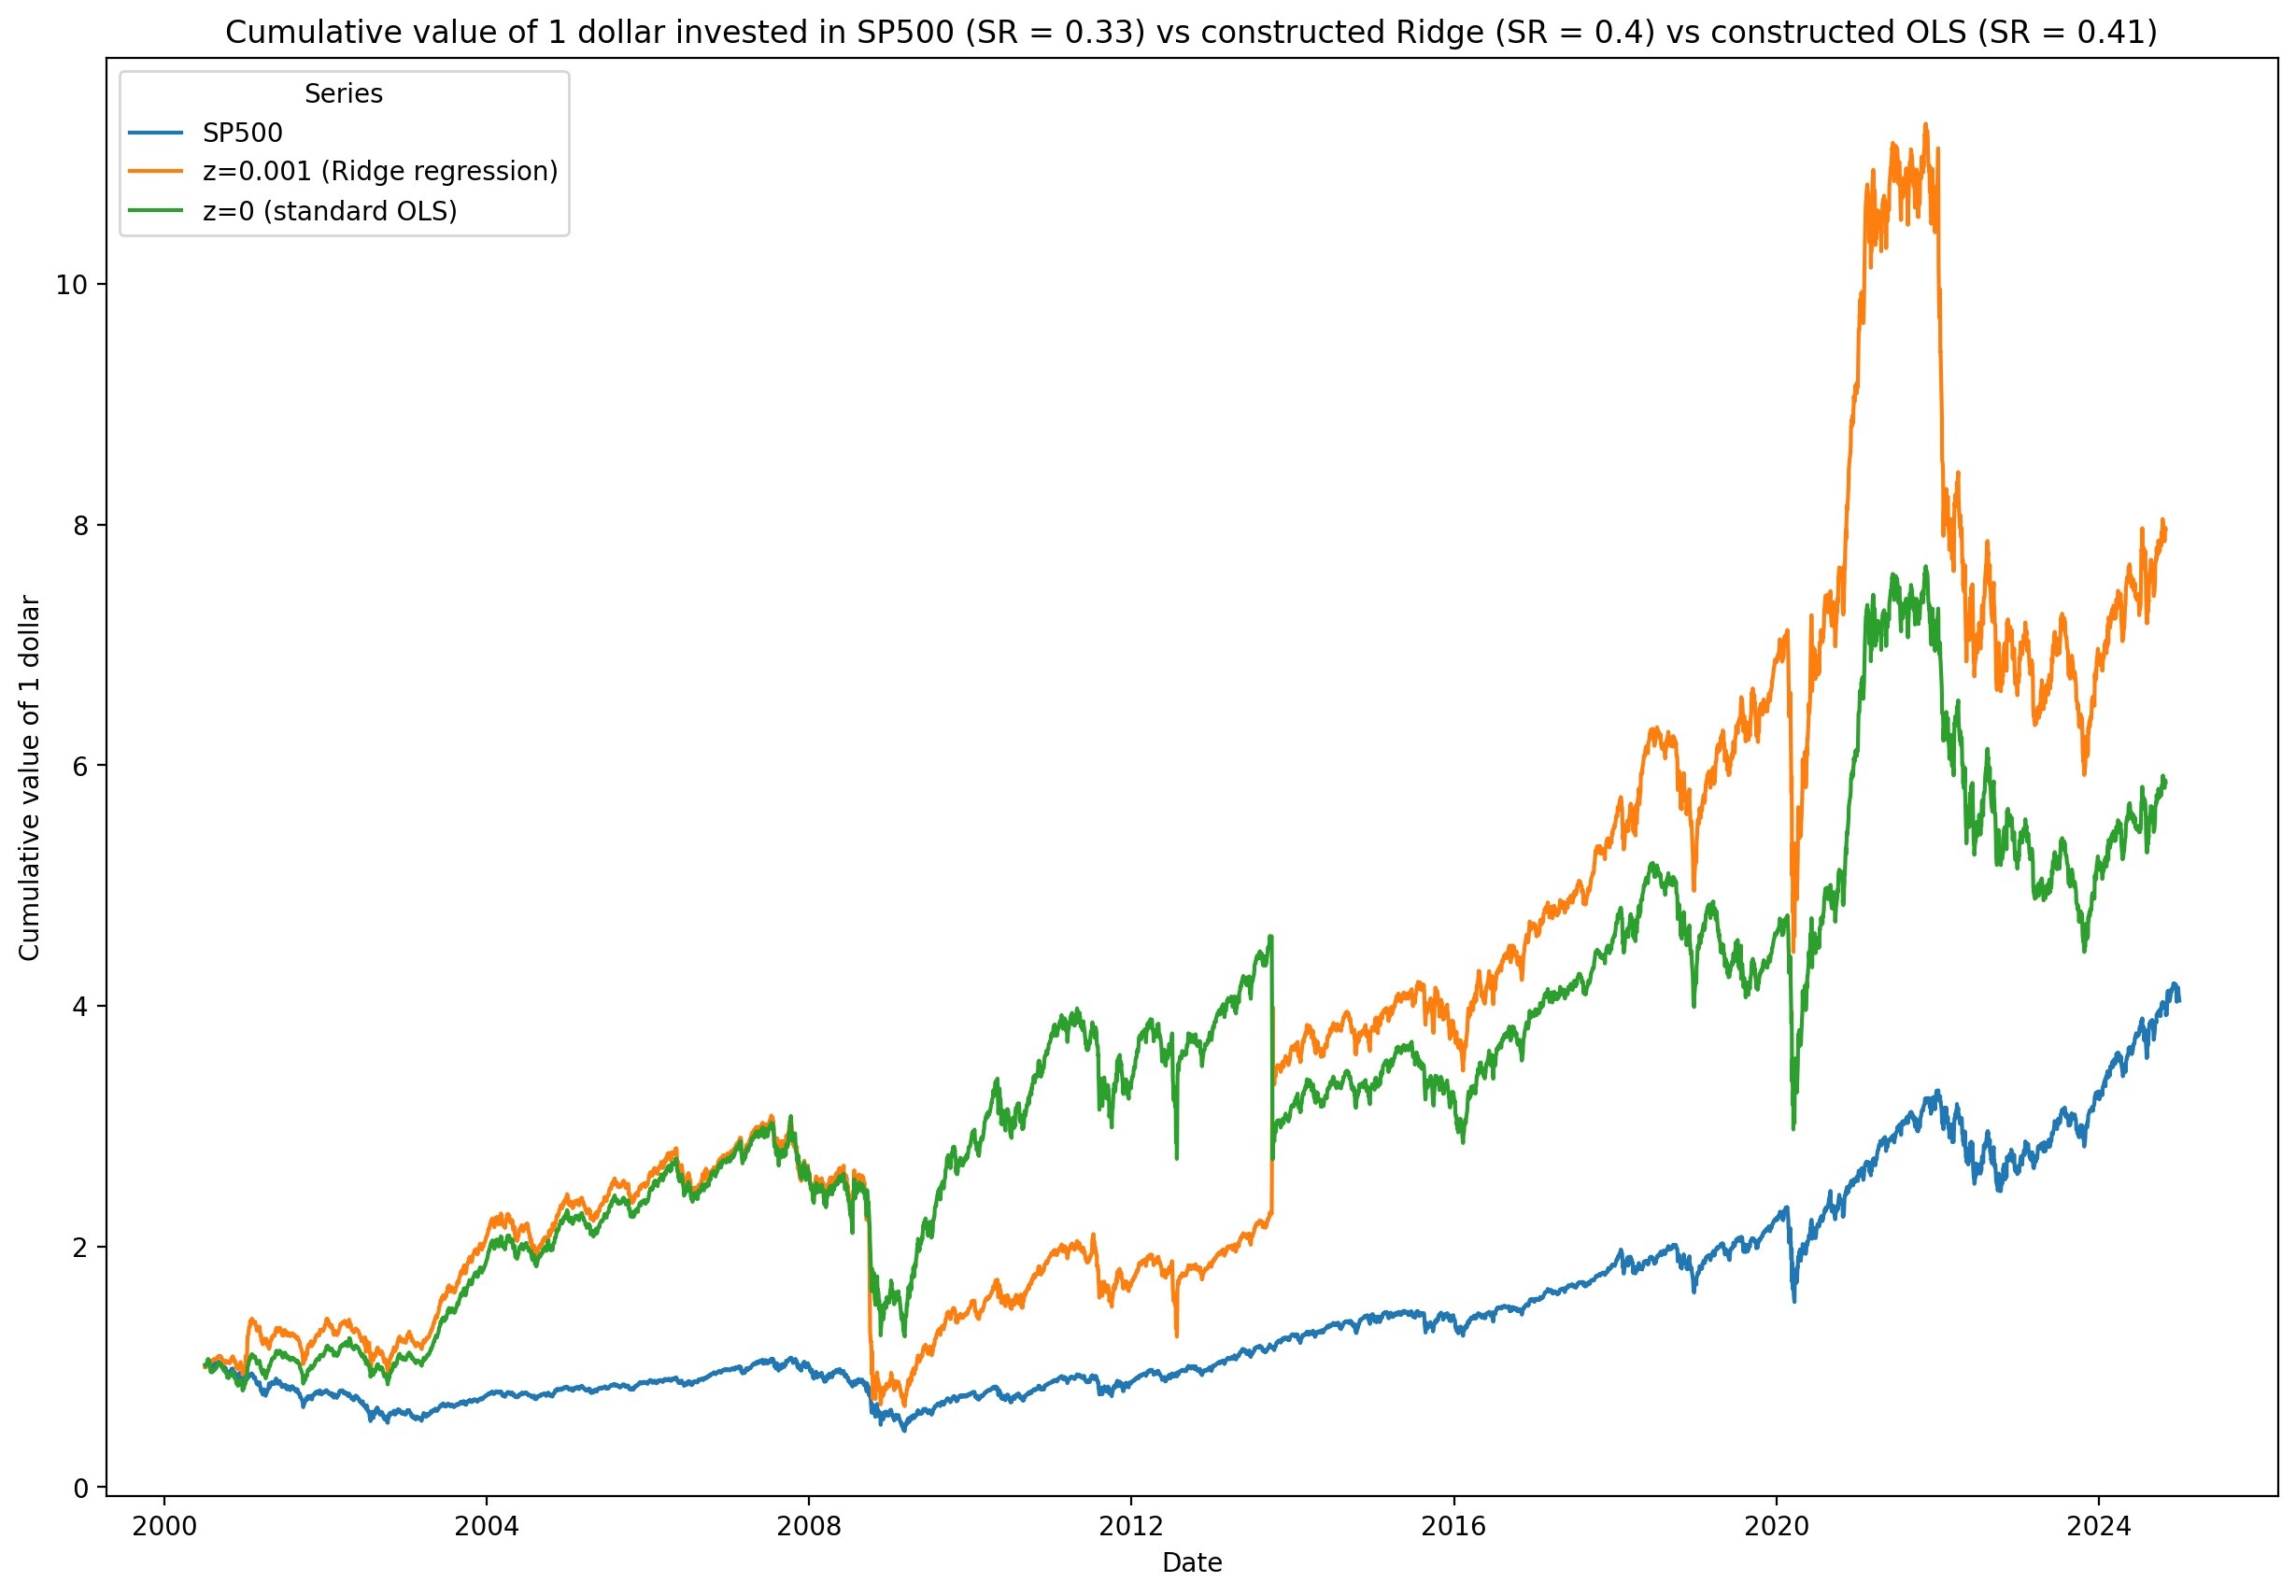

In [49]:
sharpe_SP = bm.sharpe_ratio(sp500, riskfree, 'sprtrn', 'ON risk-free rate')
sharpe_benchmark = bm.sharpe_ratio(portfolio_returns_df,riskfree,"weighted_return", 'ON risk-free rate')
sharpe_benchmark_OLS = bm.sharpe_ratio(OLS_ret,riskfree,"weighted_return", "ON risk-free rate")

fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(x = sp500['date'],
             y = sp500['cumulative_1dollar'], label = 'SP500')
sns.lineplot(x = portfolio_returns_df['date'],
             y = portfolio_returns_df['cumulative_1dollar'], label = 'z=0.001 (Ridge regression)')
sns.lineplot(x = portfolio_returns_df['date'],
             y = OLS_ret['cumulative_1dollar'], label = 'z=0 (standard OLS)')

plt.legend(title="Series", loc='upper left')
plt.xlabel("Date")
plt.ylabel(f"Cumulative value of 1 dollar")
plt.title(f"Cumulative value of 1 dollar invested in SP500 (SR = {sharpe_SP}) vs constructed Ridge (SR = {sharpe_benchmark}) vs constructed OLS (SR = {sharpe_benchmark_OLS})")
plt.savefig(GRAPH_DIR + '/OLS and Ridge vs SP500 in cumulative value.png', dpi = 300)
plt.show()

*Cumulative performance ordered by the Sharpe ratio:*

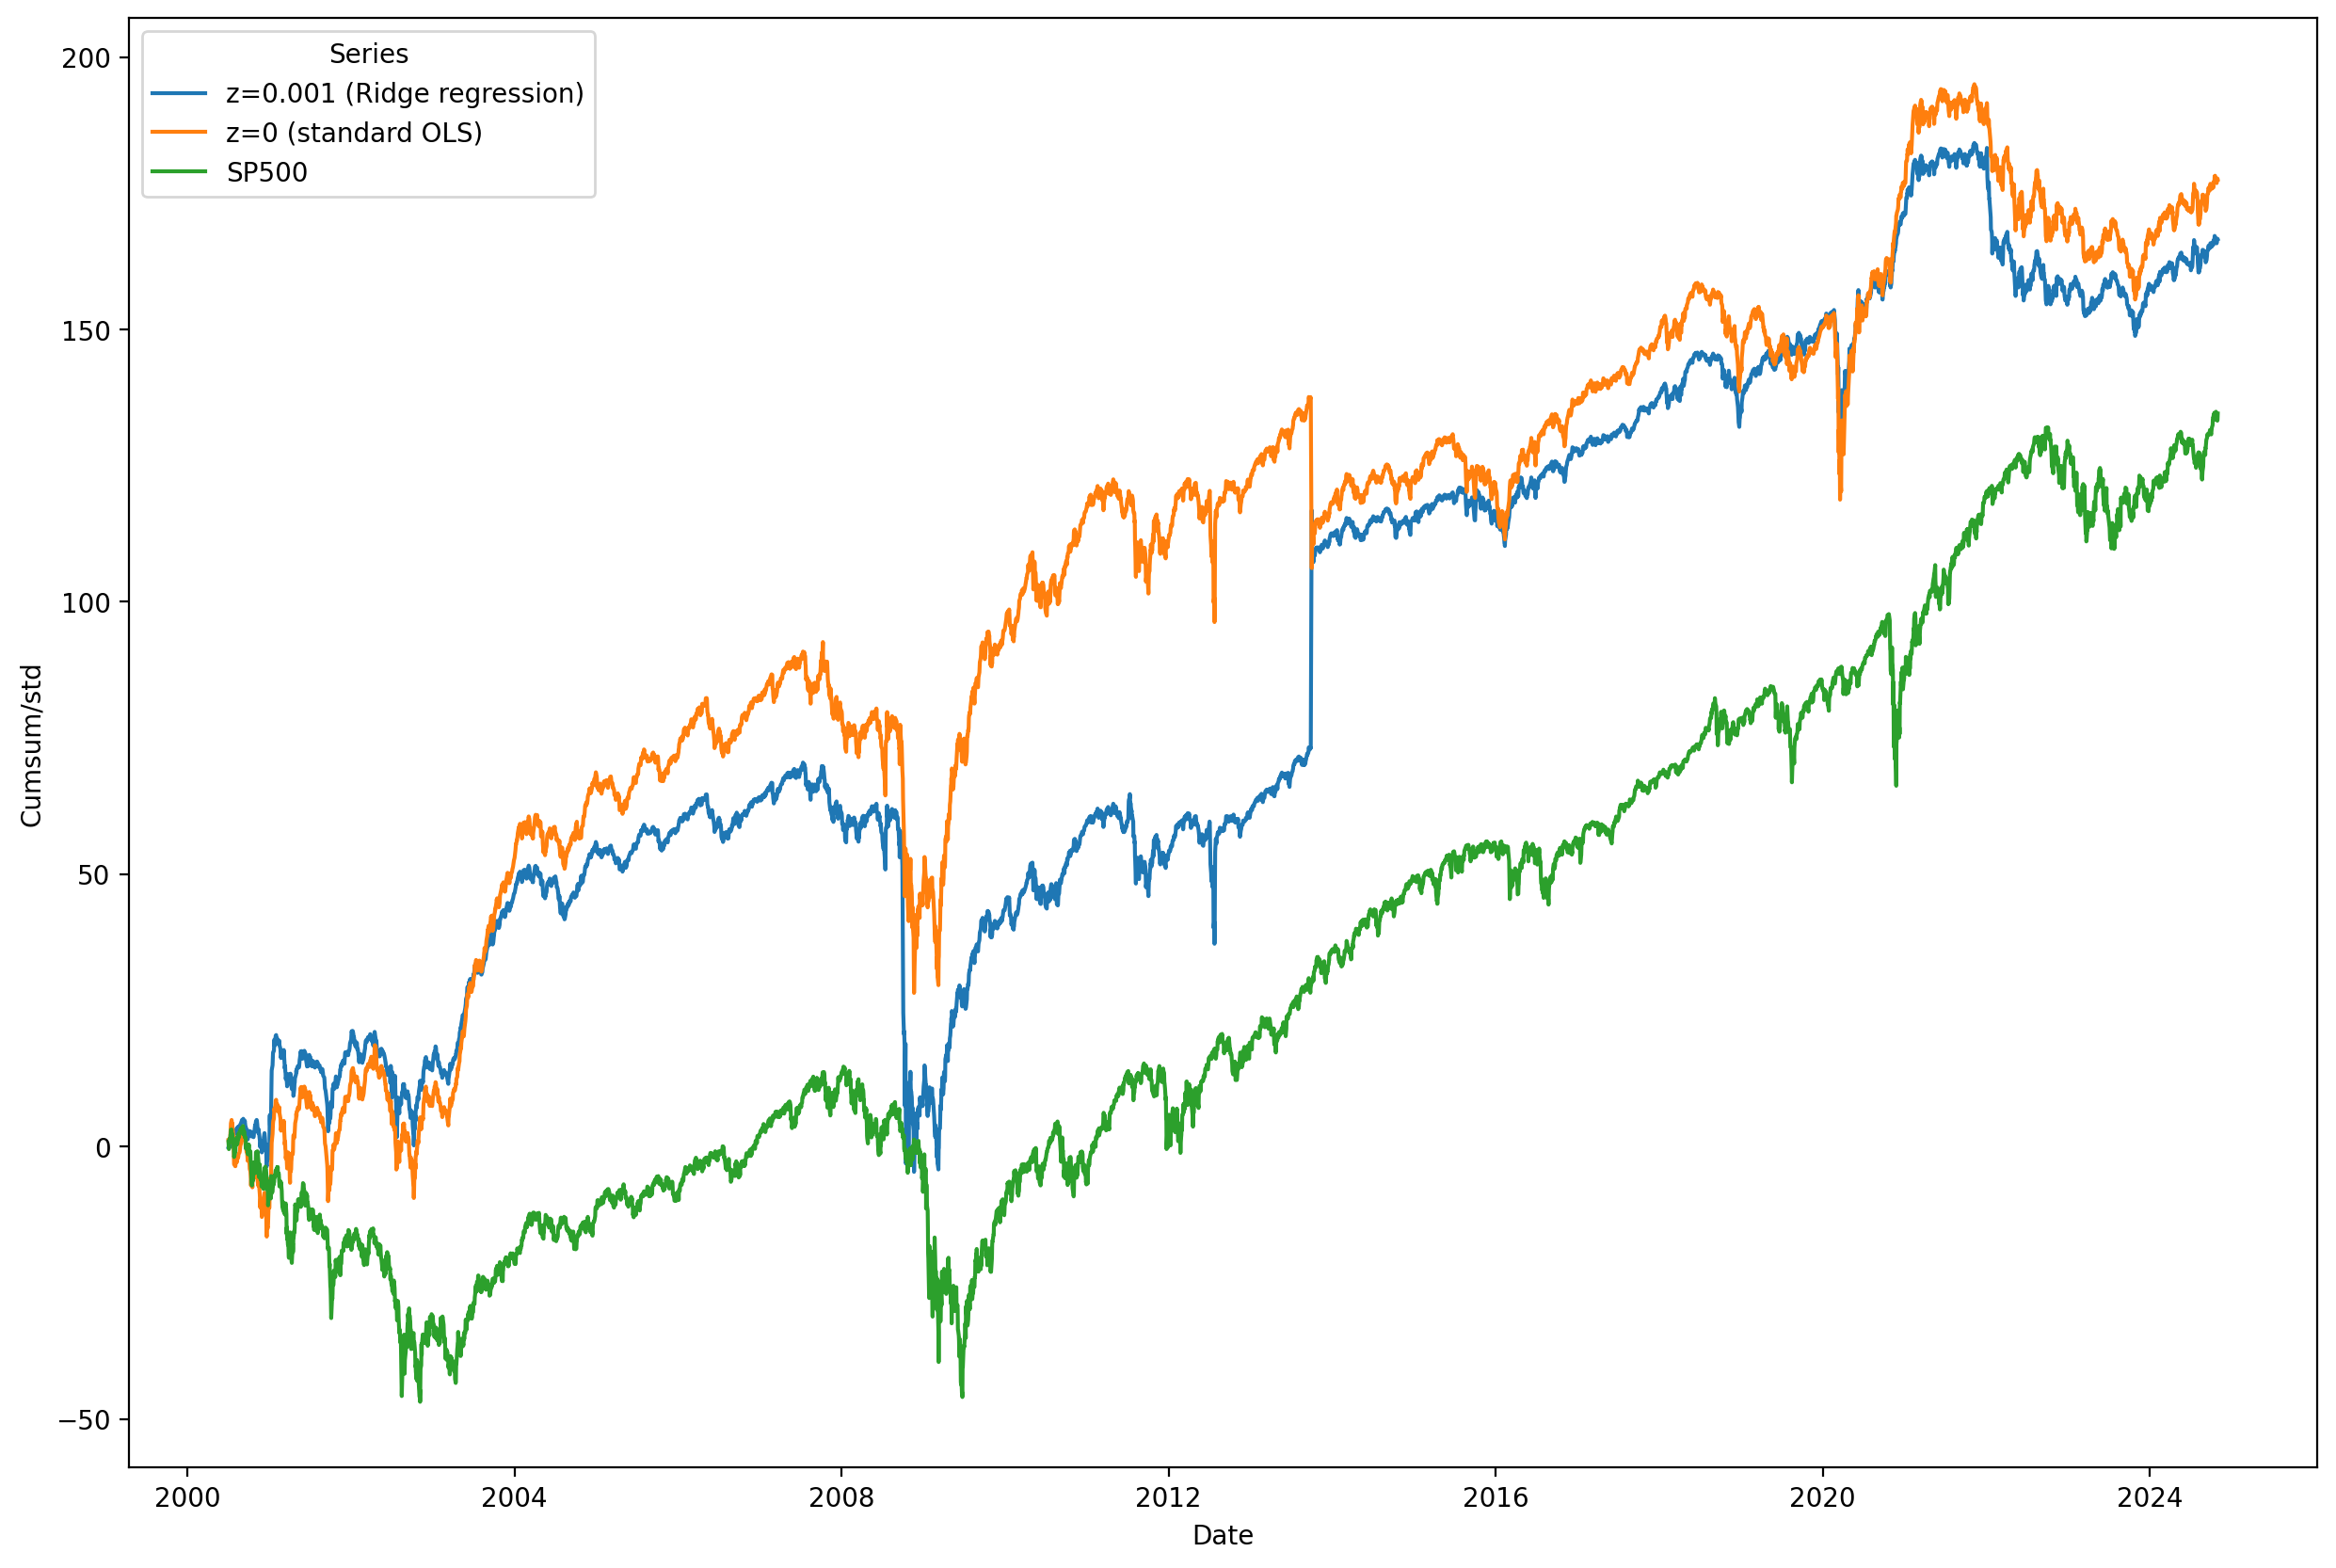

In [53]:
tmp = portfolio_returns_df["weighted_return"] / portfolio_returns_df["weighted_return"].std()
tmp_ols = OLS_ret["weighted_return"] / OLS_ret["weighted_return"].std()
tmp_sp = sp500["sprtrn"] / sp500["sprtrn"].std()


fig, ax = plt.subplots(figsize = (15, 10))

sns.lineplot(x = portfolio_returns_df['date'],
             y = tmp.cumsum(), label = 'z=0.001 (Ridge regression)')
sns.lineplot(x = portfolio_returns_df['date'],
             y = tmp_ols.cumsum(), label = 'z=0 (standard OLS)')

sns.lineplot(x = portfolio_returns_df['date'],
             y = tmp_sp.cumsum(), label = 'SP500')
plt.xlabel("Date")
plt.ylabel(f"Cumsum/std")
plt.legend(title="Series", loc='upper left')
plt.savefig(GRAPH_DIR + '/OLS and Ridge vs SP500 in cumulative value by SR.png', dpi = 300)
plt.show()

**We can see that with Ridge regularization the portfolio returns are more volatile compared to the simple linear regression**